In [2]:
import os
import random
import re
from PIL import Image
from libtiff import TIFF
import numpy as np
from shutil import copyfile

DATA_PATH = '/home/yifanc3/dataset/data/'
FRAME_PATH = DATA_PATH+'frames_128_overlap6/'
MASK_PATH = DATA_PATH+'masks_128_overlap/'
ANNO_PATH = DATA_PATH+'annotations_128_overlap/'
SAVE_PATH = '/home/yifanc3/dataset/data/selected_128_overlap/'


#annotated_mask
# this is wrong , we need to split annotation image to 64*64 too.
# annotated_mask = np.load(os.path.join(DATA_PATH,'annotated_mask.tif')) # only 0 has annotated 
                         
# Create folders to hold features and nonfeatures

folders = ['frame_0', 'mask_0', 'frame_1', 'mask_1']

# os.makedirs(SAVE_PATH)
# for folder in folders:
#     os.makedirs(SAVE_PATH + folder)

  
# Get all frames and masks, sort them, shuffle them to generate data sets.

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)

# Record Numbers

In [4]:


#read all the masks to see if 1/0 >= 10/(64*64)
# the ratio need to be calculated by histgram (plot histogram of how large ratio is the label/nolabel )
                         
Ratios = []
num_files = 0
num_anno = 0
num_no_anno = 0
num_feature_nonzero = 0
num_feature_file = 0
#select files with feature
for mask in all_masks:
    num_files += 1
    # load annotations
    filename = os.path.join(ANNO_PATH, mask)
    tif = TIFF.open(filename)
    anno_img = tif.read_image().astype(int) # 0 means annotated
    if 0 not in np.unique(anno_img):
        num_no_anno += 1
        continue
#     print('annoted:',mask)
    num_anno += 1
    #load mask image
    filename = os.path.join(MASK_PATH, mask)
    tif = TIFF.open(filename)
    mask_arr = tif.read_image().astype(int)
#     mask_arr = np.where(mask_arr==2.0, 0.0, mask_arr)
#     mask_arr = 1 - mask_arr # so 1 is the mask
    # calculate ratio
    no_1 = np.count_nonzero(mask_arr)
    ratio = no_1/(128*128)
    if(no_1 != 0):
        Ratios.append(ratio)
        num_feature_nonzero += 1
    if(no_1 >= 100):
        num_feature_file += 1
        # load frames
#         filename = os.path.join(FRAME_PATH, mask)
#         tif = TIFF.open(filename)
#         frame_arr = tif.read_image()
        # save to file masks_1 and load frames
#         np.save(os.path.join(SAVE_PATH+'frame_1/',mask[0:-4]+'.npy'), frame_arr)
#         np.save(os.path.join(SAVE_PATH+'mask_1/',mask[0:-4]+'.npy'),mask_arr)
    
print(num_files,num_anno, num_no_anno, num_feature_nonzero, num_feature_file)
    

81130 28350 52780 2967 2514


In [3]:
len(Ratios)

2967

In [9]:
print(num_files)
print(num_anno)
print(num_feature_file)

38
1
2300


# Run for selections

In [10]:
num_feature_file = 2300
num_anno = 28350
num_feature_nonzero = 2967
#read all the masks to see if 1/0 >= 10/(64*64)
# the ratio need to be calculated by histgram (plot histogram of how large ratio is the label/nolabel )

random_list = np.concatenate((np.ones(num_feature_file),np.zeros(num_anno-num_feature_nonzero-num_feature_file))) #print(a,b,'\t',darray) 
np.random.shuffle(random_list)

num_files = 0
num_anno = 0
num_no_anno = 0 
# add to num_files
num_feature_nonzero = 0 
num_feature_zero = 0 #count index for random_list
# add to num_anno
num_feature_file = 0 
num_nofeature_file = 0 # these two number should be the same

#select files with feature and without feature
for mask in all_masks:
    num_files += 1
    # load annotations
    filename = os.path.join(ANNO_PATH, mask)
    tif = TIFF.open(filename)
    anno_img = tif.read_image().astype(int) # 0 means annotated
    if 0 not in np.unique(anno_img):
        num_no_anno += 1
        continue
    # annoated 
    print('annoted:',mask)
    num_anno += 1
    #load mask image
    filename = os.path.join(MASK_PATH, mask)
    tif = TIFF.open(filename)
    mask_arr = tif.read_image().astype(int)
    mask_arr = np.where(mask_arr==2.0, 0.0, mask_arr)
    mask_arr = 1 - mask_arr # so 1 is the mask
    # calculate ratio
    no_1 = np.count_nonzero(mask_arr)
            
    if(no_1 != 0):
        num_feature_nonzero += 1
    else: # no feature but annotated 
        if random_list[num_feature_zero] != 1:
            num_feature_zero += 1 
            continue
        filename = os.path.join(FRAME_PATH, mask)
        tif = TIFF.open(filename)
        frame_arr = tif.read_image()
        # save to file masks_1 and load frames
        np.save(os.path.join(SAVE_PATH+'frame_0/',mask[0:-4]+'.npy'), frame_arr)
        np.save(os.path.join(SAVE_PATH+'mask_0/',mask[0:-4]+'.npy'),mask_arr)     
        num_feature_zero += 1 
        num_nofeature_file += 1
    if(no_1 >= 100):
        num_feature_file += 1
        # load frames
        filename = os.path.join(FRAME_PATH, mask)
        tif = TIFF.open(filename)
        frame_arr = tif.read_image()
        # save to file masks_1 and load frames
        np.save(os.path.join(SAVE_PATH+'frame_1/',mask[0:-4]+'.npy'), frame_arr)
        np.save(os.path.join(SAVE_PATH+'mask_1/',mask[0:-4]+'.npy'),mask_arr)
    
print(num_files,num_anno, num_no_anno, num_feature_nonzero, num_feature_zero, num_feature_file, num_nofeature_file)
    

annoted: 001_039.tif
annoted: 001_040.tif
annoted: 001_041.tif
annoted: 001_042.tif
annoted: 001_043.tif
annoted: 001_044.tif
annoted: 001_045.tif
annoted: 001_046.tif
annoted: 001_047.tif
annoted: 001_048.tif
annoted: 001_049.tif
annoted: 001_050.tif
annoted: 001_051.tif
annoted: 001_052.tif
annoted: 001_053.tif
annoted: 002_036.tif
annoted: 002_037.tif
annoted: 002_038.tif
annoted: 002_039.tif
annoted: 002_040.tif
annoted: 002_041.tif
annoted: 002_042.tif
annoted: 002_043.tif
annoted: 002_044.tif
annoted: 002_045.tif
annoted: 002_046.tif
annoted: 002_047.tif
annoted: 002_048.tif
annoted: 002_049.tif
annoted: 002_050.tif
annoted: 002_051.tif
annoted: 002_052.tif
annoted: 002_053.tif
annoted: 002_054.tif
annoted: 003_034.tif
annoted: 003_035.tif
annoted: 003_036.tif
annoted: 003_037.tif
annoted: 003_038.tif
annoted: 003_039.tif
annoted: 003_040.tif
annoted: 003_041.tif
annoted: 003_042.tif
annoted: 003_043.tif
annoted: 003_044.tif
annoted: 003_045.tif
annoted: 003_046.tif
annoted: 003_

annoted: 012_074.tif
annoted: 012_075.tif
annoted: 012_076.tif
annoted: 012_077.tif
annoted: 013_023.tif
annoted: 013_024.tif
annoted: 013_025.tif
annoted: 013_026.tif
annoted: 013_027.tif
annoted: 013_028.tif
annoted: 013_029.tif
annoted: 013_030.tif
annoted: 013_031.tif
annoted: 013_032.tif
annoted: 013_033.tif
annoted: 013_034.tif
annoted: 013_035.tif
annoted: 013_036.tif
annoted: 013_037.tif
annoted: 013_038.tif
annoted: 013_039.tif
annoted: 013_040.tif
annoted: 013_041.tif
annoted: 013_042.tif
annoted: 013_043.tif
annoted: 013_044.tif
annoted: 013_045.tif
annoted: 013_046.tif
annoted: 013_047.tif
annoted: 013_048.tif
annoted: 013_049.tif
annoted: 013_050.tif
annoted: 013_051.tif
annoted: 013_052.tif
annoted: 013_053.tif
annoted: 013_054.tif
annoted: 013_055.tif
annoted: 013_056.tif
annoted: 013_057.tif
annoted: 013_058.tif
annoted: 013_059.tif
annoted: 013_060.tif
annoted: 013_061.tif
annoted: 013_062.tif
annoted: 013_063.tif
annoted: 013_064.tif
annoted: 013_065.tif
annoted: 013_

annoted: 019_068.tif
annoted: 019_069.tif
annoted: 019_070.tif
annoted: 019_071.tif
annoted: 019_072.tif
annoted: 019_073.tif
annoted: 019_074.tif
annoted: 019_075.tif
annoted: 019_076.tif
annoted: 019_077.tif
annoted: 019_078.tif
annoted: 019_079.tif
annoted: 019_080.tif
annoted: 019_081.tif
annoted: 019_082.tif
annoted: 019_083.tif
annoted: 020_019.tif
annoted: 020_020.tif
annoted: 020_021.tif
annoted: 020_022.tif
annoted: 020_023.tif
annoted: 020_024.tif
annoted: 020_025.tif
annoted: 020_026.tif
annoted: 020_027.tif
annoted: 020_028.tif
annoted: 020_029.tif
annoted: 020_030.tif
annoted: 020_031.tif
annoted: 020_032.tif
annoted: 020_033.tif
annoted: 020_034.tif
annoted: 020_035.tif
annoted: 020_036.tif
annoted: 020_037.tif
annoted: 020_038.tif
annoted: 020_039.tif
annoted: 020_040.tif
annoted: 020_041.tif
annoted: 020_042.tif
annoted: 020_043.tif
annoted: 020_044.tif
annoted: 020_045.tif
annoted: 020_046.tif
annoted: 020_047.tif
annoted: 020_048.tif
annoted: 020_049.tif
annoted: 020_

annoted: 026_018.tif
annoted: 026_019.tif
annoted: 026_020.tif
annoted: 026_021.tif
annoted: 026_022.tif
annoted: 026_023.tif
annoted: 026_024.tif
annoted: 026_025.tif
annoted: 026_026.tif
annoted: 026_027.tif
annoted: 026_028.tif
annoted: 026_029.tif
annoted: 026_030.tif
annoted: 026_031.tif
annoted: 026_032.tif
annoted: 026_033.tif
annoted: 026_034.tif
annoted: 026_035.tif
annoted: 026_036.tif
annoted: 026_037.tif
annoted: 026_038.tif
annoted: 026_039.tif
annoted: 026_040.tif
annoted: 026_041.tif
annoted: 026_042.tif
annoted: 026_043.tif
annoted: 026_044.tif
annoted: 026_045.tif
annoted: 026_046.tif
annoted: 026_047.tif
annoted: 026_048.tif
annoted: 026_049.tif
annoted: 026_050.tif
annoted: 026_051.tif
annoted: 026_052.tif
annoted: 026_053.tif
annoted: 026_054.tif
annoted: 026_055.tif
annoted: 026_056.tif
annoted: 026_057.tif
annoted: 026_058.tif
annoted: 026_059.tif
annoted: 026_060.tif
annoted: 026_061.tif
annoted: 026_062.tif
annoted: 026_063.tif
annoted: 026_064.tif
annoted: 026_

annoted: 031_076.tif
annoted: 031_077.tif
annoted: 031_078.tif
annoted: 031_079.tif
annoted: 031_080.tif
annoted: 031_081.tif
annoted: 031_082.tif
annoted: 031_083.tif
annoted: 031_084.tif
annoted: 031_085.tif
annoted: 031_086.tif
annoted: 031_087.tif
annoted: 031_088.tif
annoted: 031_089.tif
annoted: 031_090.tif
annoted: 032_016.tif
annoted: 032_017.tif
annoted: 032_018.tif
annoted: 032_019.tif
annoted: 032_020.tif
annoted: 032_021.tif
annoted: 032_022.tif
annoted: 032_023.tif
annoted: 032_024.tif
annoted: 032_025.tif
annoted: 032_026.tif
annoted: 032_027.tif
annoted: 032_028.tif
annoted: 032_029.tif
annoted: 032_030.tif
annoted: 032_031.tif
annoted: 032_032.tif
annoted: 032_033.tif
annoted: 032_034.tif
annoted: 032_035.tif
annoted: 032_036.tif
annoted: 032_037.tif
annoted: 032_038.tif
annoted: 032_039.tif
annoted: 032_040.tif
annoted: 032_041.tif
annoted: 032_042.tif
annoted: 032_043.tif
annoted: 032_044.tif
annoted: 032_045.tif
annoted: 032_046.tif
annoted: 032_047.tif
annoted: 032_

annoted: 037_015.tif
annoted: 037_016.tif
annoted: 037_017.tif
annoted: 037_018.tif
annoted: 037_019.tif
annoted: 037_020.tif
annoted: 037_021.tif
annoted: 037_022.tif
annoted: 037_023.tif
annoted: 037_024.tif
annoted: 037_025.tif
annoted: 037_026.tif
annoted: 037_027.tif
annoted: 037_028.tif
annoted: 037_029.tif
annoted: 037_030.tif
annoted: 037_031.tif
annoted: 037_032.tif
annoted: 037_033.tif
annoted: 037_034.tif
annoted: 037_035.tif
annoted: 037_036.tif
annoted: 037_037.tif
annoted: 037_038.tif
annoted: 037_039.tif
annoted: 037_040.tif
annoted: 037_041.tif
annoted: 037_042.tif
annoted: 037_043.tif
annoted: 037_044.tif
annoted: 037_045.tif
annoted: 037_046.tif
annoted: 037_047.tif
annoted: 037_048.tif
annoted: 037_049.tif
annoted: 037_050.tif
annoted: 037_051.tif
annoted: 037_052.tif
annoted: 037_053.tif
annoted: 037_054.tif
annoted: 037_055.tif
annoted: 037_056.tif
annoted: 037_057.tif
annoted: 037_058.tif
annoted: 037_059.tif
annoted: 037_060.tif
annoted: 037_061.tif
annoted: 037_

annoted: 041_092.tif
annoted: 041_093.tif
annoted: 042_014.tif
annoted: 042_015.tif
annoted: 042_016.tif
annoted: 042_017.tif
annoted: 042_018.tif
annoted: 042_019.tif
annoted: 042_020.tif
annoted: 042_021.tif
annoted: 042_022.tif
annoted: 042_023.tif
annoted: 042_024.tif
annoted: 042_025.tif
annoted: 042_026.tif
annoted: 042_027.tif
annoted: 042_028.tif
annoted: 042_029.tif
annoted: 042_030.tif
annoted: 042_031.tif
annoted: 042_032.tif
annoted: 042_033.tif
annoted: 042_034.tif
annoted: 042_035.tif
annoted: 042_036.tif
annoted: 042_037.tif
annoted: 042_038.tif
annoted: 042_039.tif
annoted: 042_040.tif
annoted: 042_041.tif
annoted: 042_042.tif
annoted: 042_043.tif
annoted: 042_044.tif
annoted: 042_045.tif
annoted: 042_046.tif
annoted: 042_047.tif
annoted: 042_048.tif
annoted: 042_049.tif
annoted: 042_050.tif
annoted: 042_051.tif
annoted: 042_052.tif
annoted: 042_053.tif
annoted: 042_054.tif
annoted: 042_055.tif
annoted: 042_056.tif
annoted: 042_057.tif
annoted: 042_058.tif
annoted: 042_

annoted: 047_013.tif
annoted: 047_014.tif
annoted: 047_015.tif
annoted: 047_016.tif
annoted: 047_017.tif
annoted: 047_018.tif
annoted: 047_019.tif
annoted: 047_020.tif
annoted: 047_021.tif
annoted: 047_022.tif
annoted: 047_023.tif
annoted: 047_024.tif
annoted: 047_025.tif
annoted: 047_026.tif
annoted: 047_027.tif
annoted: 047_028.tif
annoted: 047_029.tif
annoted: 047_030.tif
annoted: 047_031.tif
annoted: 047_032.tif
annoted: 047_033.tif
annoted: 047_034.tif
annoted: 047_035.tif
annoted: 047_036.tif
annoted: 047_037.tif
annoted: 047_038.tif
annoted: 047_039.tif
annoted: 047_040.tif
annoted: 047_041.tif
annoted: 047_042.tif
annoted: 047_043.tif
annoted: 047_044.tif
annoted: 047_045.tif
annoted: 047_046.tif
annoted: 047_047.tif
annoted: 047_048.tif
annoted: 047_049.tif
annoted: 047_050.tif
annoted: 047_051.tif
annoted: 047_052.tif
annoted: 047_053.tif
annoted: 047_054.tif
annoted: 047_055.tif
annoted: 047_056.tif
annoted: 047_057.tif
annoted: 047_058.tif
annoted: 047_059.tif
annoted: 047_

annoted: 051_082.tif
annoted: 051_083.tif
annoted: 051_084.tif
annoted: 051_085.tif
annoted: 051_086.tif
annoted: 051_087.tif
annoted: 051_088.tif
annoted: 051_089.tif
annoted: 051_090.tif
annoted: 051_091.tif
annoted: 051_092.tif
annoted: 051_093.tif
annoted: 051_094.tif
annoted: 051_095.tif
annoted: 051_096.tif
annoted: 051_097.tif
annoted: 052_014.tif
annoted: 052_015.tif
annoted: 052_016.tif
annoted: 052_017.tif
annoted: 052_018.tif
annoted: 052_019.tif
annoted: 052_020.tif
annoted: 052_021.tif
annoted: 052_022.tif
annoted: 052_023.tif
annoted: 052_024.tif
annoted: 052_025.tif
annoted: 052_026.tif
annoted: 052_027.tif
annoted: 052_028.tif
annoted: 052_029.tif
annoted: 052_030.tif
annoted: 052_031.tif
annoted: 052_032.tif
annoted: 052_033.tif
annoted: 052_034.tif
annoted: 052_035.tif
annoted: 052_036.tif
annoted: 052_037.tif
annoted: 052_038.tif
annoted: 052_039.tif
annoted: 052_040.tif
annoted: 052_041.tif
annoted: 052_042.tif
annoted: 052_043.tif
annoted: 052_044.tif
annoted: 052_

annoted: 056_070.tif
annoted: 056_071.tif
annoted: 056_072.tif
annoted: 056_073.tif
annoted: 056_074.tif
annoted: 056_075.tif
annoted: 056_076.tif
annoted: 056_077.tif
annoted: 056_078.tif
annoted: 056_079.tif
annoted: 056_080.tif
annoted: 056_081.tif
annoted: 056_082.tif
annoted: 056_083.tif
annoted: 056_084.tif
annoted: 056_085.tif
annoted: 056_086.tif
annoted: 056_087.tif
annoted: 056_088.tif
annoted: 056_089.tif
annoted: 056_090.tif
annoted: 056_091.tif
annoted: 056_092.tif
annoted: 056_093.tif
annoted: 056_094.tif
annoted: 056_095.tif
annoted: 056_096.tif
annoted: 056_097.tif
annoted: 056_098.tif
annoted: 056_099.tif
annoted: 056_100.tif
annoted: 057_014.tif
annoted: 057_015.tif
annoted: 057_016.tif
annoted: 057_017.tif
annoted: 057_018.tif
annoted: 057_019.tif
annoted: 057_020.tif
annoted: 057_021.tif
annoted: 057_022.tif
annoted: 057_023.tif
annoted: 057_024.tif
annoted: 057_025.tif
annoted: 057_026.tif
annoted: 057_027.tif
annoted: 057_028.tif
annoted: 057_029.tif
annoted: 057_

annoted: 061_041.tif
annoted: 061_042.tif
annoted: 061_043.tif
annoted: 061_044.tif
annoted: 061_045.tif
annoted: 061_046.tif
annoted: 061_047.tif
annoted: 061_048.tif
annoted: 061_049.tif
annoted: 061_050.tif
annoted: 061_051.tif
annoted: 061_052.tif
annoted: 061_053.tif
annoted: 061_054.tif
annoted: 061_055.tif
annoted: 061_056.tif
annoted: 061_057.tif
annoted: 061_058.tif
annoted: 061_059.tif
annoted: 061_060.tif
annoted: 061_061.tif
annoted: 061_062.tif
annoted: 061_063.tif
annoted: 061_064.tif
annoted: 061_065.tif
annoted: 061_066.tif
annoted: 061_067.tif
annoted: 061_068.tif
annoted: 061_069.tif
annoted: 061_070.tif
annoted: 061_071.tif
annoted: 061_072.tif
annoted: 061_073.tif
annoted: 061_074.tif
annoted: 061_075.tif
annoted: 061_076.tif
annoted: 061_077.tif
annoted: 061_078.tif
annoted: 061_079.tif
annoted: 061_080.tif
annoted: 061_081.tif
annoted: 061_082.tif
annoted: 061_083.tif
annoted: 061_084.tif
annoted: 061_085.tif
annoted: 061_086.tif
annoted: 061_087.tif
annoted: 061_

annoted: 065_082.tif
annoted: 065_083.tif
annoted: 065_084.tif
annoted: 065_085.tif
annoted: 065_086.tif
annoted: 065_087.tif
annoted: 065_088.tif
annoted: 065_089.tif
annoted: 065_090.tif
annoted: 065_091.tif
annoted: 065_092.tif
annoted: 065_093.tif
annoted: 065_094.tif
annoted: 065_095.tif
annoted: 065_096.tif
annoted: 065_097.tif
annoted: 065_098.tif
annoted: 065_099.tif
annoted: 065_100.tif
annoted: 065_101.tif
annoted: 065_102.tif
annoted: 065_103.tif
annoted: 065_104.tif
annoted: 066_016.tif
annoted: 066_017.tif
annoted: 066_018.tif
annoted: 066_019.tif
annoted: 066_020.tif
annoted: 066_021.tif
annoted: 066_022.tif
annoted: 066_023.tif
annoted: 066_024.tif
annoted: 066_025.tif
annoted: 066_026.tif
annoted: 066_027.tif
annoted: 066_028.tif
annoted: 066_029.tif
annoted: 066_030.tif
annoted: 066_031.tif
annoted: 066_032.tif
annoted: 066_033.tif
annoted: 066_034.tif
annoted: 066_035.tif
annoted: 066_036.tif
annoted: 066_037.tif
annoted: 066_038.tif
annoted: 066_039.tif
annoted: 066_

annoted: 070_051.tif
annoted: 070_052.tif
annoted: 070_053.tif
annoted: 070_054.tif
annoted: 070_055.tif
annoted: 070_056.tif
annoted: 070_057.tif
annoted: 070_058.tif
annoted: 070_059.tif
annoted: 070_060.tif
annoted: 070_061.tif
annoted: 070_062.tif
annoted: 070_063.tif
annoted: 070_064.tif
annoted: 070_065.tif
annoted: 070_066.tif
annoted: 070_067.tif
annoted: 070_068.tif
annoted: 070_069.tif
annoted: 070_070.tif
annoted: 070_071.tif
annoted: 070_072.tif
annoted: 070_073.tif
annoted: 070_074.tif
annoted: 070_075.tif
annoted: 070_076.tif
annoted: 070_077.tif
annoted: 070_078.tif
annoted: 070_079.tif
annoted: 070_080.tif
annoted: 070_081.tif
annoted: 070_082.tif
annoted: 070_083.tif
annoted: 070_084.tif
annoted: 070_085.tif
annoted: 070_086.tif
annoted: 070_087.tif
annoted: 070_088.tif
annoted: 070_089.tif
annoted: 070_090.tif
annoted: 070_091.tif
annoted: 070_092.tif
annoted: 070_093.tif
annoted: 070_094.tif
annoted: 070_095.tif
annoted: 070_096.tif
annoted: 070_097.tif
annoted: 070_

annoted: 074_078.tif
annoted: 074_079.tif
annoted: 074_080.tif
annoted: 074_081.tif
annoted: 074_082.tif
annoted: 074_083.tif
annoted: 074_084.tif
annoted: 074_085.tif
annoted: 074_086.tif
annoted: 074_087.tif
annoted: 074_088.tif
annoted: 074_089.tif
annoted: 074_090.tif
annoted: 074_091.tif
annoted: 074_092.tif
annoted: 074_093.tif
annoted: 074_094.tif
annoted: 074_095.tif
annoted: 074_096.tif
annoted: 074_097.tif
annoted: 074_098.tif
annoted: 074_099.tif
annoted: 074_100.tif
annoted: 074_101.tif
annoted: 074_102.tif
annoted: 074_103.tif
annoted: 074_104.tif
annoted: 074_105.tif
annoted: 074_106.tif
annoted: 074_107.tif
annoted: 074_108.tif
annoted: 074_109.tif
annoted: 075_017.tif
annoted: 075_018.tif
annoted: 075_019.tif
annoted: 075_020.tif
annoted: 075_021.tif
annoted: 075_022.tif
annoted: 075_023.tif
annoted: 075_024.tif
annoted: 075_025.tif
annoted: 075_026.tif
annoted: 075_027.tif
annoted: 075_028.tif
annoted: 075_029.tif
annoted: 075_030.tif
annoted: 075_031.tif
annoted: 075_

annoted: 079_016.tif
annoted: 079_017.tif
annoted: 079_018.tif
annoted: 079_019.tif
annoted: 079_020.tif
annoted: 079_021.tif
annoted: 079_022.tif
annoted: 079_023.tif
annoted: 079_024.tif
annoted: 079_025.tif
annoted: 079_026.tif
annoted: 079_027.tif
annoted: 079_028.tif
annoted: 079_029.tif
annoted: 079_030.tif
annoted: 079_031.tif
annoted: 079_032.tif
annoted: 079_033.tif
annoted: 079_034.tif
annoted: 079_035.tif
annoted: 079_036.tif
annoted: 079_037.tif
annoted: 079_038.tif
annoted: 079_039.tif
annoted: 079_040.tif
annoted: 079_041.tif
annoted: 079_042.tif
annoted: 079_043.tif
annoted: 079_044.tif
annoted: 079_045.tif
annoted: 079_046.tif
annoted: 079_047.tif
annoted: 079_048.tif
annoted: 079_049.tif
annoted: 079_050.tif
annoted: 079_051.tif
annoted: 079_052.tif
annoted: 079_053.tif
annoted: 079_054.tif
annoted: 079_055.tif
annoted: 079_056.tif
annoted: 079_057.tif
annoted: 079_058.tif
annoted: 079_059.tif
annoted: 079_060.tif
annoted: 079_061.tif
annoted: 079_062.tif
annoted: 079_

annoted: 083_013.tif
annoted: 083_014.tif
annoted: 083_015.tif
annoted: 083_016.tif
annoted: 083_017.tif
annoted: 083_018.tif
annoted: 083_019.tif
annoted: 083_020.tif
annoted: 083_021.tif
annoted: 083_022.tif
annoted: 083_023.tif
annoted: 083_024.tif
annoted: 083_025.tif
annoted: 083_026.tif
annoted: 083_027.tif
annoted: 083_028.tif
annoted: 083_029.tif
annoted: 083_030.tif
annoted: 083_031.tif
annoted: 083_032.tif
annoted: 083_033.tif
annoted: 083_034.tif
annoted: 083_035.tif
annoted: 083_036.tif
annoted: 083_037.tif
annoted: 083_038.tif
annoted: 083_039.tif
annoted: 083_040.tif
annoted: 083_041.tif
annoted: 083_042.tif
annoted: 083_043.tif
annoted: 083_044.tif
annoted: 083_045.tif
annoted: 083_046.tif
annoted: 083_047.tif
annoted: 083_048.tif
annoted: 083_049.tif
annoted: 083_050.tif
annoted: 083_051.tif
annoted: 083_052.tif
annoted: 083_053.tif
annoted: 083_054.tif
annoted: 083_055.tif
annoted: 083_056.tif
annoted: 083_057.tif
annoted: 083_058.tif
annoted: 083_059.tif
annoted: 083_

annoted: 086_114.tif
annoted: 086_115.tif
annoted: 087_012.tif
annoted: 087_013.tif
annoted: 087_014.tif
annoted: 087_015.tif
annoted: 087_016.tif
annoted: 087_017.tif
annoted: 087_018.tif
annoted: 087_019.tif
annoted: 087_020.tif
annoted: 087_021.tif
annoted: 087_022.tif
annoted: 087_023.tif
annoted: 087_024.tif
annoted: 087_025.tif
annoted: 087_026.tif
annoted: 087_027.tif
annoted: 087_028.tif
annoted: 087_029.tif
annoted: 087_030.tif
annoted: 087_031.tif
annoted: 087_032.tif
annoted: 087_033.tif
annoted: 087_034.tif
annoted: 087_035.tif
annoted: 087_036.tif
annoted: 087_037.tif
annoted: 087_038.tif
annoted: 087_039.tif
annoted: 087_040.tif
annoted: 087_041.tif
annoted: 087_042.tif
annoted: 087_043.tif
annoted: 087_044.tif
annoted: 087_045.tif
annoted: 087_046.tif
annoted: 087_047.tif
annoted: 087_048.tif
annoted: 087_049.tif
annoted: 087_050.tif
annoted: 087_051.tif
annoted: 087_052.tif
annoted: 087_053.tif
annoted: 087_054.tif
annoted: 087_055.tif
annoted: 087_056.tif
annoted: 087_

annoted: 090_098.tif
annoted: 090_099.tif
annoted: 090_100.tif
annoted: 090_101.tif
annoted: 090_102.tif
annoted: 090_103.tif
annoted: 090_104.tif
annoted: 090_105.tif
annoted: 090_106.tif
annoted: 090_107.tif
annoted: 090_108.tif
annoted: 090_109.tif
annoted: 090_110.tif
annoted: 090_111.tif
annoted: 090_112.tif
annoted: 090_113.tif
annoted: 090_114.tif
annoted: 090_115.tif
annoted: 090_116.tif
annoted: 090_117.tif
annoted: 091_013.tif
annoted: 091_014.tif
annoted: 091_015.tif
annoted: 091_016.tif
annoted: 091_017.tif
annoted: 091_018.tif
annoted: 091_019.tif
annoted: 091_020.tif
annoted: 091_021.tif
annoted: 091_022.tif
annoted: 091_023.tif
annoted: 091_024.tif
annoted: 091_025.tif
annoted: 091_026.tif
annoted: 091_027.tif
annoted: 091_028.tif
annoted: 091_029.tif
annoted: 091_030.tif
annoted: 091_031.tif
annoted: 091_032.tif
annoted: 091_033.tif
annoted: 091_034.tif
annoted: 091_035.tif
annoted: 091_036.tif
annoted: 091_037.tif
annoted: 091_038.tif
annoted: 091_039.tif
annoted: 091_

annoted: 094_082.tif
annoted: 094_083.tif
annoted: 094_084.tif
annoted: 094_085.tif
annoted: 094_086.tif
annoted: 094_087.tif
annoted: 094_088.tif
annoted: 094_089.tif
annoted: 094_090.tif
annoted: 094_091.tif
annoted: 094_092.tif
annoted: 094_093.tif
annoted: 094_094.tif
annoted: 094_095.tif
annoted: 094_096.tif
annoted: 094_097.tif
annoted: 094_098.tif
annoted: 094_099.tif
annoted: 094_100.tif
annoted: 094_101.tif
annoted: 094_102.tif
annoted: 094_103.tif
annoted: 094_104.tif
annoted: 094_105.tif
annoted: 094_106.tif
annoted: 094_107.tif
annoted: 094_108.tif
annoted: 094_109.tif
annoted: 094_110.tif
annoted: 094_111.tif
annoted: 094_112.tif
annoted: 094_113.tif
annoted: 094_114.tif
annoted: 094_115.tif
annoted: 094_116.tif
annoted: 094_117.tif
annoted: 094_118.tif
annoted: 094_119.tif
annoted: 095_013.tif
annoted: 095_014.tif
annoted: 095_015.tif
annoted: 095_016.tif
annoted: 095_017.tif
annoted: 095_018.tif
annoted: 095_019.tif
annoted: 095_020.tif
annoted: 095_021.tif
annoted: 095_

annoted: 098_043.tif
annoted: 098_044.tif
annoted: 098_045.tif
annoted: 098_046.tif
annoted: 098_047.tif
annoted: 098_048.tif
annoted: 098_049.tif
annoted: 098_050.tif
annoted: 098_051.tif
annoted: 098_052.tif
annoted: 098_053.tif
annoted: 098_054.tif
annoted: 098_055.tif
annoted: 098_056.tif
annoted: 098_057.tif
annoted: 098_058.tif
annoted: 098_059.tif
annoted: 098_060.tif
annoted: 098_061.tif
annoted: 098_062.tif
annoted: 098_063.tif
annoted: 098_064.tif
annoted: 098_065.tif
annoted: 098_066.tif
annoted: 098_067.tif
annoted: 098_068.tif
annoted: 098_069.tif
annoted: 098_070.tif
annoted: 098_071.tif
annoted: 098_072.tif
annoted: 098_073.tif
annoted: 098_074.tif
annoted: 098_075.tif
annoted: 098_076.tif
annoted: 098_077.tif
annoted: 098_078.tif
annoted: 098_079.tif
annoted: 098_080.tif
annoted: 098_081.tif
annoted: 098_082.tif
annoted: 098_083.tif
annoted: 098_084.tif
annoted: 098_085.tif
annoted: 098_086.tif
annoted: 098_087.tif
annoted: 098_088.tif
annoted: 098_089.tif
annoted: 098_

annoted: 102_013.tif
annoted: 102_014.tif
annoted: 102_015.tif
annoted: 102_016.tif
annoted: 102_017.tif
annoted: 102_018.tif
annoted: 102_019.tif
annoted: 102_020.tif
annoted: 102_021.tif
annoted: 102_022.tif
annoted: 102_023.tif
annoted: 102_024.tif
annoted: 102_025.tif
annoted: 102_026.tif
annoted: 102_027.tif
annoted: 102_028.tif
annoted: 102_029.tif
annoted: 102_030.tif
annoted: 102_031.tif
annoted: 102_032.tif
annoted: 102_033.tif
annoted: 102_034.tif
annoted: 102_035.tif
annoted: 102_036.tif
annoted: 102_037.tif
annoted: 102_038.tif
annoted: 102_039.tif
annoted: 102_040.tif
annoted: 102_041.tif
annoted: 102_042.tif
annoted: 102_043.tif
annoted: 102_044.tif
annoted: 102_045.tif
annoted: 102_046.tif
annoted: 102_047.tif
annoted: 102_048.tif
annoted: 102_049.tif
annoted: 102_050.tif
annoted: 102_051.tif
annoted: 102_052.tif
annoted: 102_053.tif
annoted: 102_054.tif
annoted: 102_055.tif
annoted: 102_056.tif
annoted: 102_057.tif
annoted: 102_058.tif
annoted: 102_059.tif
annoted: 102_

annoted: 105_084.tif
annoted: 105_085.tif
annoted: 105_086.tif
annoted: 105_087.tif
annoted: 105_088.tif
annoted: 105_089.tif
annoted: 105_090.tif
annoted: 105_091.tif
annoted: 105_092.tif
annoted: 105_093.tif
annoted: 105_094.tif
annoted: 105_095.tif
annoted: 105_096.tif
annoted: 105_097.tif
annoted: 105_098.tif
annoted: 105_099.tif
annoted: 105_100.tif
annoted: 105_101.tif
annoted: 105_102.tif
annoted: 105_103.tif
annoted: 105_104.tif
annoted: 105_105.tif
annoted: 105_106.tif
annoted: 105_107.tif
annoted: 105_108.tif
annoted: 105_109.tif
annoted: 105_110.tif
annoted: 105_111.tif
annoted: 105_112.tif
annoted: 105_113.tif
annoted: 105_114.tif
annoted: 105_115.tif
annoted: 105_116.tif
annoted: 105_117.tif
annoted: 105_118.tif
annoted: 105_119.tif
annoted: 105_120.tif
annoted: 105_121.tif
annoted: 105_122.tif
annoted: 105_123.tif
annoted: 105_124.tif
annoted: 106_014.tif
annoted: 106_015.tif
annoted: 106_016.tif
annoted: 106_017.tif
annoted: 106_018.tif
annoted: 106_019.tif
annoted: 106_

annoted: 109_034.tif
annoted: 109_035.tif
annoted: 109_036.tif
annoted: 109_037.tif
annoted: 109_038.tif
annoted: 109_039.tif
annoted: 109_040.tif
annoted: 109_041.tif
annoted: 109_042.tif
annoted: 109_043.tif
annoted: 109_044.tif
annoted: 109_045.tif
annoted: 109_046.tif
annoted: 109_047.tif
annoted: 109_048.tif
annoted: 109_049.tif
annoted: 109_050.tif
annoted: 109_051.tif
annoted: 109_052.tif
annoted: 109_053.tif
annoted: 109_054.tif
annoted: 109_055.tif
annoted: 109_056.tif
annoted: 109_057.tif
annoted: 109_058.tif
annoted: 109_059.tif
annoted: 109_060.tif
annoted: 109_061.tif
annoted: 109_062.tif
annoted: 109_063.tif
annoted: 109_064.tif
annoted: 109_065.tif
annoted: 109_066.tif
annoted: 109_067.tif
annoted: 109_068.tif
annoted: 109_069.tif
annoted: 109_070.tif
annoted: 109_071.tif
annoted: 109_072.tif
annoted: 109_073.tif
annoted: 109_074.tif
annoted: 109_075.tif
annoted: 109_076.tif
annoted: 109_077.tif
annoted: 109_078.tif
annoted: 109_079.tif
annoted: 109_080.tif
annoted: 109_

annoted: 112_087.tif
annoted: 112_088.tif
annoted: 112_089.tif
annoted: 112_090.tif
annoted: 112_091.tif
annoted: 112_092.tif
annoted: 112_093.tif
annoted: 112_094.tif
annoted: 112_095.tif
annoted: 112_096.tif
annoted: 112_097.tif
annoted: 112_098.tif
annoted: 112_099.tif
annoted: 112_100.tif
annoted: 112_101.tif
annoted: 112_102.tif
annoted: 112_103.tif
annoted: 112_104.tif
annoted: 112_105.tif
annoted: 112_106.tif
annoted: 112_107.tif
annoted: 112_108.tif
annoted: 112_109.tif
annoted: 112_110.tif
annoted: 112_112.tif
annoted: 112_113.tif
annoted: 112_114.tif
annoted: 112_115.tif
annoted: 112_116.tif
annoted: 112_117.tif
annoted: 112_118.tif
annoted: 112_119.tif
annoted: 112_120.tif
annoted: 112_121.tif
annoted: 112_122.tif
annoted: 112_123.tif
annoted: 112_124.tif
annoted: 112_125.tif
annoted: 112_126.tif
annoted: 112_127.tif
annoted: 113_014.tif
annoted: 113_015.tif
annoted: 113_016.tif
annoted: 113_017.tif
annoted: 113_018.tif
annoted: 113_019.tif
annoted: 113_020.tif
annoted: 113_

annoted: 116_056.tif
annoted: 116_057.tif
annoted: 116_058.tif
annoted: 116_059.tif
annoted: 116_060.tif
annoted: 116_061.tif
annoted: 116_062.tif
annoted: 116_063.tif
annoted: 116_064.tif
annoted: 116_065.tif
annoted: 116_066.tif
annoted: 116_067.tif
annoted: 116_068.tif
annoted: 116_069.tif
annoted: 116_070.tif
annoted: 116_071.tif
annoted: 116_072.tif
annoted: 116_073.tif
annoted: 116_074.tif
annoted: 116_075.tif
annoted: 116_076.tif
annoted: 116_077.tif
annoted: 116_078.tif
annoted: 116_079.tif
annoted: 116_080.tif
annoted: 116_081.tif
annoted: 116_082.tif
annoted: 116_083.tif
annoted: 116_084.tif
annoted: 116_085.tif
annoted: 116_086.tif
annoted: 116_087.tif
annoted: 116_088.tif
annoted: 116_089.tif
annoted: 116_090.tif
annoted: 116_091.tif
annoted: 116_092.tif
annoted: 116_093.tif
annoted: 116_094.tif
annoted: 116_095.tif
annoted: 116_096.tif
annoted: 116_097.tif
annoted: 116_098.tif
annoted: 116_099.tif
annoted: 116_100.tif
annoted: 116_101.tif
annoted: 116_102.tif
annoted: 116_

annoted: 119_110.tif
annoted: 119_111.tif
annoted: 119_112.tif
annoted: 119_113.tif
annoted: 119_114.tif
annoted: 119_115.tif
annoted: 119_116.tif
annoted: 119_117.tif
annoted: 119_118.tif
annoted: 119_119.tif
annoted: 119_120.tif
annoted: 119_121.tif
annoted: 119_122.tif
annoted: 119_123.tif
annoted: 119_124.tif
annoted: 119_125.tif
annoted: 119_126.tif
annoted: 119_127.tif
annoted: 119_128.tif
annoted: 119_129.tif
annoted: 119_130.tif
annoted: 119_131.tif
annoted: 120_016.tif
annoted: 120_017.tif
annoted: 120_018.tif
annoted: 120_019.tif
annoted: 120_020.tif
annoted: 120_021.tif
annoted: 120_022.tif
annoted: 120_023.tif
annoted: 120_024.tif
annoted: 120_025.tif
annoted: 120_026.tif
annoted: 120_027.tif
annoted: 120_028.tif
annoted: 120_029.tif
annoted: 120_030.tif
annoted: 120_031.tif
annoted: 120_032.tif
annoted: 120_033.tif
annoted: 120_034.tif
annoted: 120_035.tif
annoted: 120_036.tif
annoted: 120_037.tif
annoted: 120_038.tif
annoted: 120_039.tif
annoted: 120_040.tif
annoted: 120_

annoted: 123_047.tif
annoted: 123_048.tif
annoted: 123_049.tif
annoted: 123_050.tif
annoted: 123_051.tif
annoted: 123_052.tif
annoted: 123_053.tif
annoted: 123_054.tif
annoted: 123_055.tif
annoted: 123_056.tif
annoted: 123_057.tif
annoted: 123_058.tif
annoted: 123_059.tif
annoted: 123_060.tif
annoted: 123_061.tif
annoted: 123_062.tif
annoted: 123_063.tif
annoted: 123_064.tif
annoted: 123_065.tif
annoted: 123_066.tif
annoted: 123_067.tif
annoted: 123_068.tif
annoted: 123_069.tif
annoted: 123_070.tif
annoted: 123_071.tif
annoted: 123_072.tif
annoted: 123_073.tif
annoted: 123_074.tif
annoted: 123_075.tif
annoted: 123_076.tif
annoted: 123_077.tif
annoted: 123_078.tif
annoted: 123_079.tif
annoted: 123_080.tif
annoted: 123_081.tif
annoted: 123_082.tif
annoted: 123_083.tif
annoted: 123_084.tif
annoted: 123_085.tif
annoted: 123_086.tif
annoted: 123_087.tif
annoted: 123_088.tif
annoted: 123_089.tif
annoted: 123_090.tif
annoted: 123_091.tif
annoted: 123_092.tif
annoted: 123_093.tif
annoted: 123_

annoted: 126_091.tif
annoted: 126_092.tif
annoted: 126_093.tif
annoted: 126_094.tif
annoted: 126_095.tif
annoted: 126_096.tif
annoted: 126_097.tif
annoted: 126_098.tif
annoted: 126_099.tif
annoted: 126_100.tif
annoted: 126_101.tif
annoted: 126_102.tif
annoted: 126_103.tif
annoted: 126_104.tif
annoted: 126_105.tif
annoted: 126_106.tif
annoted: 126_107.tif
annoted: 126_108.tif
annoted: 126_109.tif
annoted: 126_110.tif
annoted: 126_111.tif
annoted: 126_112.tif
annoted: 126_113.tif
annoted: 126_114.tif
annoted: 126_115.tif
annoted: 126_116.tif
annoted: 126_117.tif
annoted: 126_118.tif
annoted: 126_119.tif
annoted: 126_120.tif
annoted: 126_121.tif
annoted: 126_122.tif
annoted: 126_123.tif
annoted: 126_124.tif
annoted: 126_125.tif
annoted: 126_126.tif
annoted: 126_127.tif
annoted: 126_128.tif
annoted: 126_129.tif
annoted: 126_130.tif
annoted: 126_131.tif
annoted: 126_132.tif
annoted: 126_133.tif
annoted: 126_134.tif
annoted: 127_019.tif
annoted: 127_020.tif
annoted: 127_021.tif
annoted: 127_

annoted: 130_022.tif
annoted: 130_023.tif
annoted: 130_024.tif
annoted: 130_025.tif
annoted: 130_026.tif
annoted: 130_027.tif
annoted: 130_028.tif
annoted: 130_029.tif
annoted: 130_030.tif
annoted: 130_031.tif
annoted: 130_032.tif
annoted: 130_033.tif
annoted: 130_034.tif
annoted: 130_035.tif
annoted: 130_036.tif
annoted: 130_037.tif
annoted: 130_038.tif
annoted: 130_039.tif
annoted: 130_040.tif
annoted: 130_041.tif
annoted: 130_042.tif
annoted: 130_043.tif
annoted: 130_044.tif
annoted: 130_045.tif
annoted: 130_046.tif
annoted: 130_047.tif
annoted: 130_048.tif
annoted: 130_049.tif
annoted: 130_050.tif
annoted: 130_051.tif
annoted: 130_052.tif
annoted: 130_053.tif
annoted: 130_054.tif
annoted: 130_055.tif
annoted: 130_056.tif
annoted: 130_057.tif
annoted: 130_058.tif
annoted: 130_059.tif
annoted: 130_060.tif
annoted: 130_061.tif
annoted: 130_062.tif
annoted: 130_063.tif
annoted: 130_064.tif
annoted: 130_065.tif
annoted: 130_066.tif
annoted: 130_067.tif
annoted: 130_068.tif
annoted: 130_

annoted: 133_090.tif
annoted: 133_091.tif
annoted: 133_092.tif
annoted: 133_093.tif
annoted: 133_094.tif
annoted: 133_095.tif
annoted: 133_096.tif
annoted: 133_097.tif
annoted: 133_098.tif
annoted: 133_099.tif
annoted: 133_100.tif
annoted: 133_101.tif
annoted: 133_102.tif
annoted: 133_103.tif
annoted: 133_104.tif
annoted: 133_105.tif
annoted: 133_106.tif
annoted: 133_107.tif
annoted: 133_108.tif
annoted: 133_109.tif
annoted: 133_110.tif
annoted: 133_111.tif
annoted: 133_112.tif
annoted: 133_113.tif
annoted: 133_114.tif
annoted: 133_115.tif
annoted: 133_116.tif
annoted: 133_117.tif
annoted: 133_118.tif
annoted: 133_119.tif
annoted: 133_120.tif
annoted: 133_121.tif
annoted: 133_122.tif
annoted: 133_123.tif
annoted: 133_124.tif
annoted: 133_125.tif
annoted: 133_126.tif
annoted: 133_127.tif
annoted: 133_128.tif
annoted: 133_129.tif
annoted: 133_130.tif
annoted: 133_131.tif
annoted: 133_132.tif
annoted: 133_133.tif
annoted: 133_134.tif
annoted: 133_135.tif
annoted: 133_136.tif
annoted: 133_

annoted: 137_078.tif
annoted: 137_079.tif
annoted: 137_080.tif
annoted: 137_081.tif
annoted: 137_082.tif
annoted: 137_083.tif
annoted: 137_084.tif
annoted: 137_085.tif
annoted: 137_086.tif
annoted: 137_087.tif
annoted: 137_088.tif
annoted: 137_089.tif
annoted: 137_090.tif
annoted: 137_091.tif
annoted: 137_092.tif
annoted: 137_093.tif
annoted: 137_094.tif
annoted: 137_095.tif
annoted: 137_096.tif
annoted: 137_097.tif
annoted: 137_098.tif
annoted: 137_099.tif
annoted: 137_100.tif
annoted: 137_101.tif
annoted: 137_102.tif
annoted: 137_103.tif
annoted: 137_104.tif
annoted: 137_105.tif
annoted: 137_106.tif
annoted: 137_107.tif
annoted: 137_108.tif
annoted: 137_109.tif
annoted: 137_110.tif
annoted: 137_111.tif
annoted: 137_112.tif
annoted: 137_113.tif
annoted: 137_114.tif
annoted: 137_115.tif
annoted: 137_116.tif
annoted: 137_117.tif
annoted: 137_118.tif
annoted: 137_119.tif
annoted: 137_120.tif
annoted: 137_121.tif
annoted: 137_122.tif
annoted: 137_123.tif
annoted: 137_124.tif
annoted: 137_

annoted: 141_033.tif
annoted: 141_034.tif
annoted: 141_035.tif
annoted: 141_036.tif
annoted: 141_037.tif
annoted: 141_038.tif
annoted: 141_039.tif
annoted: 141_040.tif
annoted: 141_041.tif
annoted: 141_042.tif
annoted: 141_043.tif
annoted: 141_044.tif
annoted: 141_045.tif
annoted: 141_046.tif
annoted: 141_047.tif
annoted: 141_048.tif
annoted: 141_049.tif
annoted: 141_050.tif
annoted: 141_051.tif
annoted: 141_052.tif
annoted: 141_053.tif
annoted: 141_054.tif
annoted: 141_055.tif
annoted: 141_056.tif
annoted: 141_057.tif
annoted: 141_058.tif
annoted: 141_059.tif
annoted: 141_060.tif
annoted: 141_061.tif
annoted: 141_062.tif
annoted: 141_063.tif
annoted: 141_064.tif
annoted: 141_065.tif
annoted: 141_066.tif
annoted: 141_067.tif
annoted: 141_068.tif
annoted: 141_069.tif
annoted: 141_070.tif
annoted: 141_071.tif
annoted: 141_072.tif
annoted: 141_073.tif
annoted: 141_074.tif
annoted: 141_075.tif
annoted: 141_076.tif
annoted: 141_077.tif
annoted: 141_078.tif
annoted: 141_079.tif
annoted: 141_

annoted: 144_103.tif
annoted: 144_104.tif
annoted: 144_105.tif
annoted: 144_106.tif
annoted: 144_107.tif
annoted: 144_108.tif
annoted: 144_109.tif
annoted: 144_110.tif
annoted: 144_111.tif
annoted: 144_112.tif
annoted: 144_113.tif
annoted: 144_114.tif
annoted: 144_115.tif
annoted: 144_116.tif
annoted: 144_117.tif
annoted: 144_118.tif
annoted: 144_119.tif
annoted: 144_120.tif
annoted: 144_121.tif
annoted: 144_122.tif
annoted: 144_123.tif
annoted: 144_124.tif
annoted: 144_125.tif
annoted: 144_126.tif
annoted: 144_127.tif
annoted: 144_128.tif
annoted: 144_129.tif
annoted: 144_130.tif
annoted: 144_131.tif
annoted: 144_132.tif
annoted: 144_133.tif
annoted: 144_134.tif
annoted: 144_135.tif
annoted: 144_136.tif
annoted: 144_137.tif
annoted: 144_138.tif
annoted: 144_139.tif
annoted: 144_140.tif
annoted: 144_141.tif
annoted: 144_142.tif
annoted: 144_143.tif
annoted: 144_144.tif
annoted: 145_038.tif
annoted: 145_039.tif
annoted: 145_040.tif
annoted: 145_041.tif
annoted: 145_042.tif
annoted: 145_

annoted: 148_064.tif
annoted: 148_065.tif
annoted: 148_066.tif
annoted: 148_067.tif
annoted: 148_068.tif
annoted: 148_069.tif
annoted: 148_070.tif
annoted: 148_071.tif
annoted: 148_072.tif
annoted: 148_073.tif
annoted: 148_074.tif
annoted: 148_075.tif
annoted: 148_076.tif
annoted: 148_077.tif
annoted: 148_078.tif
annoted: 148_079.tif
annoted: 148_080.tif
annoted: 148_081.tif
annoted: 148_082.tif
annoted: 148_083.tif
annoted: 148_084.tif
annoted: 148_085.tif
annoted: 148_086.tif
annoted: 148_087.tif
annoted: 148_088.tif
annoted: 148_089.tif
annoted: 148_090.tif
annoted: 148_091.tif
annoted: 148_092.tif
annoted: 148_093.tif
annoted: 148_094.tif
annoted: 148_095.tif
annoted: 148_096.tif
annoted: 148_097.tif
annoted: 148_098.tif
annoted: 148_099.tif
annoted: 148_100.tif
annoted: 148_101.tif
annoted: 148_102.tif
annoted: 148_103.tif
annoted: 148_104.tif
annoted: 148_105.tif
annoted: 148_106.tif
annoted: 148_107.tif
annoted: 148_108.tif
annoted: 148_109.tif
annoted: 148_110.tif
annoted: 148_

annoted: 151_130.tif
annoted: 151_131.tif
annoted: 151_132.tif
annoted: 151_133.tif
annoted: 151_134.tif
annoted: 151_135.tif
annoted: 151_136.tif
annoted: 151_137.tif
annoted: 151_138.tif
annoted: 151_139.tif
annoted: 151_140.tif
annoted: 151_141.tif
annoted: 151_142.tif
annoted: 151_143.tif
annoted: 151_144.tif
annoted: 151_145.tif
annoted: 151_146.tif
annoted: 151_147.tif
annoted: 151_148.tif
annoted: 151_149.tif
annoted: 151_150.tif
annoted: 151_151.tif
annoted: 151_152.tif
annoted: 151_153.tif
annoted: 151_154.tif
annoted: 152_043.tif
annoted: 152_044.tif
annoted: 152_045.tif
annoted: 152_046.tif
annoted: 152_047.tif
annoted: 152_048.tif
annoted: 152_049.tif
annoted: 152_050.tif
annoted: 152_051.tif
annoted: 152_052.tif
annoted: 152_053.tif
annoted: 152_054.tif
annoted: 152_055.tif
annoted: 152_056.tif
annoted: 152_057.tif
annoted: 152_058.tif
annoted: 152_059.tif
annoted: 152_060.tif
annoted: 152_061.tif
annoted: 152_062.tif
annoted: 152_063.tif
annoted: 152_064.tif
annoted: 152_

annoted: 155_083.tif
annoted: 155_084.tif
annoted: 155_085.tif
annoted: 155_086.tif
annoted: 155_087.tif
annoted: 155_088.tif
annoted: 155_089.tif
annoted: 155_090.tif
annoted: 155_091.tif
annoted: 155_092.tif
annoted: 155_093.tif
annoted: 155_094.tif
annoted: 155_095.tif
annoted: 155_096.tif
annoted: 155_097.tif
annoted: 155_098.tif
annoted: 155_099.tif
annoted: 155_100.tif
annoted: 155_101.tif
annoted: 155_102.tif
annoted: 155_103.tif
annoted: 155_104.tif
annoted: 155_105.tif
annoted: 155_106.tif
annoted: 155_107.tif
annoted: 155_108.tif
annoted: 155_109.tif
annoted: 155_110.tif
annoted: 155_111.tif
annoted: 155_112.tif
annoted: 155_113.tif
annoted: 155_114.tif
annoted: 155_115.tif
annoted: 155_116.tif
annoted: 155_117.tif
annoted: 155_118.tif
annoted: 155_119.tif
annoted: 155_120.tif
annoted: 155_121.tif
annoted: 155_122.tif
annoted: 155_123.tif
annoted: 155_124.tif
annoted: 155_125.tif
annoted: 155_126.tif
annoted: 155_127.tif
annoted: 155_128.tif
annoted: 155_129.tif
annoted: 155_

annoted: 158_125.tif
annoted: 158_126.tif
annoted: 158_127.tif
annoted: 158_128.tif
annoted: 158_129.tif
annoted: 158_130.tif
annoted: 158_131.tif
annoted: 158_132.tif
annoted: 158_133.tif
annoted: 158_134.tif
annoted: 158_135.tif
annoted: 158_136.tif
annoted: 158_137.tif
annoted: 158_138.tif
annoted: 158_139.tif
annoted: 158_140.tif
annoted: 158_141.tif
annoted: 158_142.tif
annoted: 158_143.tif
annoted: 158_144.tif
annoted: 158_145.tif
annoted: 158_146.tif
annoted: 158_147.tif
annoted: 158_148.tif
annoted: 158_149.tif
annoted: 158_150.tif
annoted: 158_151.tif
annoted: 158_152.tif
annoted: 158_153.tif
annoted: 158_154.tif
annoted: 158_155.tif
annoted: 158_156.tif
annoted: 158_157.tif
annoted: 158_158.tif
annoted: 158_159.tif
annoted: 158_160.tif
annoted: 158_161.tif
annoted: 158_162.tif
annoted: 158_163.tif
annoted: 159_044.tif
annoted: 159_045.tif
annoted: 159_046.tif
annoted: 159_047.tif
annoted: 159_048.tif
annoted: 159_049.tif
annoted: 159_050.tif
annoted: 159_051.tif
annoted: 159_

annoted: 161_157.tif
annoted: 161_158.tif
annoted: 161_159.tif
annoted: 161_160.tif
annoted: 161_161.tif
annoted: 161_162.tif
annoted: 161_163.tif
annoted: 161_164.tif
annoted: 161_165.tif
annoted: 161_166.tif
annoted: 161_167.tif
annoted: 162_045.tif
annoted: 162_046.tif
annoted: 162_047.tif
annoted: 162_048.tif
annoted: 162_049.tif
annoted: 162_050.tif
annoted: 162_051.tif
annoted: 162_052.tif
annoted: 162_053.tif
annoted: 162_054.tif
annoted: 162_055.tif
annoted: 162_056.tif
annoted: 162_057.tif
annoted: 162_058.tif
annoted: 162_059.tif
annoted: 162_060.tif
annoted: 162_061.tif
annoted: 162_062.tif
annoted: 162_063.tif
annoted: 162_064.tif
annoted: 162_065.tif
annoted: 162_066.tif
annoted: 162_067.tif
annoted: 162_068.tif
annoted: 162_069.tif
annoted: 162_070.tif
annoted: 162_071.tif
annoted: 162_072.tif
annoted: 162_073.tif
annoted: 162_074.tif
annoted: 162_075.tif
annoted: 162_076.tif
annoted: 162_077.tif
annoted: 162_078.tif
annoted: 162_079.tif
annoted: 162_080.tif
annoted: 162_

annoted: 165_071.tif
annoted: 165_072.tif
annoted: 165_073.tif
annoted: 165_074.tif
annoted: 165_075.tif
annoted: 165_076.tif
annoted: 165_077.tif
annoted: 165_078.tif
annoted: 165_079.tif
annoted: 165_080.tif
annoted: 165_081.tif
annoted: 165_082.tif
annoted: 165_083.tif
annoted: 165_084.tif
annoted: 165_085.tif
annoted: 165_086.tif
annoted: 165_087.tif
annoted: 165_088.tif
annoted: 165_089.tif
annoted: 165_090.tif
annoted: 165_091.tif
annoted: 165_092.tif
annoted: 165_093.tif
annoted: 165_094.tif
annoted: 165_095.tif
annoted: 165_096.tif
annoted: 165_097.tif
annoted: 165_098.tif
annoted: 165_099.tif
annoted: 165_100.tif
annoted: 165_101.tif
annoted: 165_102.tif
annoted: 165_103.tif
annoted: 165_104.tif
annoted: 165_105.tif
annoted: 165_106.tif
annoted: 165_107.tif
annoted: 165_108.tif
annoted: 165_109.tif
annoted: 165_110.tif
annoted: 165_111.tif
annoted: 165_112.tif
annoted: 165_113.tif
annoted: 165_114.tif
annoted: 165_115.tif
annoted: 165_116.tif
annoted: 165_117.tif
annoted: 165_

annoted: 168_093.tif
annoted: 168_094.tif
annoted: 168_095.tif
annoted: 168_096.tif
annoted: 168_097.tif
annoted: 168_098.tif
annoted: 168_099.tif
annoted: 168_100.tif
annoted: 168_101.tif
annoted: 168_102.tif
annoted: 168_103.tif
annoted: 168_104.tif
annoted: 168_105.tif
annoted: 168_106.tif
annoted: 168_107.tif
annoted: 168_108.tif
annoted: 168_109.tif
annoted: 168_110.tif
annoted: 168_111.tif
annoted: 168_112.tif
annoted: 168_113.tif
annoted: 168_114.tif
annoted: 168_115.tif
annoted: 168_116.tif
annoted: 168_117.tif
annoted: 168_118.tif
annoted: 168_119.tif
annoted: 168_120.tif
annoted: 168_121.tif
annoted: 168_122.tif
annoted: 168_123.tif
annoted: 168_124.tif
annoted: 168_125.tif
annoted: 168_126.tif
annoted: 168_127.tif
annoted: 168_128.tif
annoted: 168_129.tif
annoted: 168_130.tif
annoted: 168_131.tif
annoted: 168_132.tif
annoted: 168_133.tif
annoted: 168_134.tif
annoted: 168_135.tif
annoted: 168_136.tif
annoted: 168_137.tif
annoted: 168_138.tif
annoted: 168_139.tif
annoted: 168_

annoted: 171_095.tif
annoted: 171_096.tif
annoted: 171_097.tif
annoted: 171_098.tif
annoted: 171_099.tif
annoted: 171_100.tif
annoted: 171_101.tif
annoted: 171_102.tif
annoted: 171_103.tif
annoted: 171_104.tif
annoted: 171_105.tif
annoted: 171_106.tif
annoted: 171_107.tif
annoted: 171_108.tif
annoted: 171_109.tif
annoted: 171_110.tif
annoted: 171_111.tif
annoted: 171_112.tif
annoted: 171_113.tif
annoted: 171_114.tif
annoted: 171_115.tif
annoted: 171_116.tif
annoted: 171_117.tif
annoted: 171_118.tif
annoted: 171_119.tif
annoted: 171_120.tif
annoted: 171_121.tif
annoted: 171_122.tif
annoted: 171_123.tif
annoted: 171_124.tif
annoted: 171_125.tif
annoted: 171_126.tif
annoted: 171_127.tif
annoted: 171_128.tif
annoted: 171_129.tif
annoted: 171_130.tif
annoted: 171_131.tif
annoted: 171_132.tif
annoted: 171_133.tif
annoted: 171_134.tif
annoted: 171_135.tif
annoted: 171_136.tif
annoted: 171_137.tif
annoted: 171_138.tif
annoted: 171_139.tif
annoted: 171_140.tif
annoted: 171_141.tif
annoted: 171_

annoted: 174_084.tif
annoted: 174_085.tif
annoted: 174_086.tif
annoted: 174_087.tif
annoted: 174_088.tif
annoted: 174_089.tif
annoted: 174_090.tif
annoted: 174_091.tif
annoted: 174_092.tif
annoted: 174_093.tif
annoted: 174_094.tif
annoted: 174_095.tif
annoted: 174_096.tif
annoted: 174_097.tif
annoted: 174_098.tif
annoted: 174_099.tif
annoted: 174_100.tif
annoted: 174_101.tif
annoted: 174_102.tif
annoted: 174_103.tif
annoted: 174_104.tif
annoted: 174_105.tif
annoted: 174_106.tif
annoted: 174_107.tif
annoted: 174_108.tif
annoted: 174_109.tif
annoted: 174_110.tif
annoted: 174_111.tif
annoted: 174_112.tif
annoted: 174_113.tif
annoted: 174_114.tif
annoted: 174_115.tif
annoted: 174_116.tif
annoted: 174_117.tif
annoted: 174_118.tif
annoted: 174_119.tif
annoted: 174_120.tif
annoted: 174_121.tif
annoted: 174_122.tif
annoted: 174_123.tif
annoted: 174_124.tif
annoted: 174_125.tif
annoted: 174_126.tif
annoted: 174_127.tif
annoted: 174_128.tif
annoted: 174_129.tif
annoted: 174_130.tif
annoted: 174_

annoted: 177_050.tif
annoted: 177_051.tif
annoted: 177_052.tif
annoted: 177_053.tif
annoted: 177_054.tif
annoted: 177_055.tif
annoted: 177_056.tif
annoted: 177_057.tif
annoted: 177_058.tif
annoted: 177_059.tif
annoted: 177_060.tif
annoted: 177_061.tif
annoted: 177_062.tif
annoted: 177_063.tif
annoted: 177_064.tif
annoted: 177_065.tif
annoted: 177_066.tif
annoted: 177_067.tif
annoted: 177_068.tif
annoted: 177_069.tif
annoted: 177_070.tif
annoted: 177_071.tif
annoted: 177_072.tif
annoted: 177_073.tif
annoted: 177_074.tif
annoted: 177_075.tif
annoted: 177_076.tif
annoted: 177_077.tif
annoted: 177_078.tif
annoted: 177_079.tif
annoted: 177_080.tif
annoted: 177_081.tif
annoted: 177_082.tif
annoted: 177_083.tif
annoted: 177_084.tif
annoted: 177_085.tif
annoted: 177_086.tif
annoted: 177_087.tif
annoted: 177_088.tif
annoted: 177_089.tif
annoted: 177_090.tif
annoted: 177_091.tif
annoted: 177_092.tif
annoted: 177_093.tif
annoted: 177_094.tif
annoted: 177_095.tif
annoted: 177_096.tif
annoted: 177_

annoted: 179_154.tif
annoted: 179_155.tif
annoted: 179_156.tif
annoted: 179_157.tif
annoted: 179_158.tif
annoted: 179_159.tif
annoted: 179_160.tif
annoted: 179_161.tif
annoted: 179_162.tif
annoted: 179_163.tif
annoted: 179_164.tif
annoted: 179_165.tif
annoted: 179_166.tif
annoted: 179_167.tif
annoted: 179_168.tif
annoted: 179_169.tif
annoted: 179_170.tif
annoted: 179_171.tif
annoted: 179_172.tif
annoted: 179_173.tif
annoted: 179_174.tif
annoted: 179_175.tif
annoted: 179_176.tif
annoted: 179_177.tif
annoted: 179_178.tif
annoted: 179_179.tif
annoted: 179_180.tif
annoted: 179_181.tif
annoted: 179_182.tif
annoted: 179_183.tif
annoted: 179_184.tif
annoted: 179_185.tif
annoted: 179_186.tif
annoted: 179_187.tif
annoted: 179_188.tif
annoted: 179_189.tif
annoted: 179_190.tif
annoted: 179_191.tif
annoted: 179_192.tif
annoted: 179_193.tif
annoted: 179_194.tif
annoted: 179_195.tif
annoted: 180_047.tif
annoted: 180_048.tif
annoted: 180_049.tif
annoted: 180_050.tif
annoted: 180_051.tif
annoted: 180_

annoted: 182_135.tif
annoted: 182_136.tif
annoted: 182_137.tif
annoted: 182_138.tif
annoted: 182_139.tif
annoted: 182_140.tif
annoted: 182_141.tif
annoted: 182_142.tif
annoted: 182_143.tif
annoted: 182_144.tif
annoted: 182_145.tif
annoted: 182_146.tif
annoted: 182_147.tif
annoted: 182_148.tif
annoted: 182_149.tif
annoted: 182_150.tif
annoted: 182_151.tif
annoted: 182_152.tif
annoted: 182_153.tif
annoted: 182_154.tif
annoted: 182_155.tif
annoted: 182_156.tif
annoted: 182_157.tif
annoted: 182_158.tif
annoted: 182_159.tif
annoted: 182_160.tif
annoted: 182_161.tif
annoted: 182_162.tif
annoted: 182_163.tif
annoted: 182_164.tif
annoted: 182_165.tif
annoted: 182_166.tif
annoted: 182_167.tif
annoted: 182_168.tif
annoted: 182_169.tif
annoted: 182_170.tif
annoted: 182_171.tif
annoted: 182_172.tif
annoted: 182_173.tif
annoted: 182_174.tif
annoted: 182_175.tif
annoted: 182_176.tif
annoted: 182_177.tif
annoted: 182_178.tif
annoted: 182_179.tif
annoted: 182_180.tif
annoted: 182_181.tif
annoted: 182_

annoted: 185_087.tif
annoted: 185_088.tif
annoted: 185_089.tif
annoted: 185_090.tif
annoted: 185_091.tif
annoted: 185_092.tif
annoted: 185_093.tif
annoted: 185_094.tif
annoted: 185_095.tif
annoted: 185_096.tif
annoted: 185_097.tif
annoted: 185_098.tif
annoted: 185_099.tif
annoted: 185_100.tif
annoted: 185_101.tif
annoted: 185_102.tif
annoted: 185_103.tif
annoted: 185_104.tif
annoted: 185_105.tif
annoted: 185_106.tif
annoted: 185_107.tif
annoted: 185_108.tif
annoted: 185_109.tif
annoted: 185_110.tif
annoted: 185_111.tif
annoted: 185_112.tif
annoted: 185_113.tif
annoted: 185_114.tif
annoted: 185_115.tif
annoted: 185_116.tif
annoted: 185_117.tif
annoted: 185_118.tif
annoted: 185_119.tif
annoted: 185_120.tif
annoted: 185_121.tif
annoted: 185_122.tif
annoted: 185_123.tif
annoted: 185_124.tif
annoted: 185_125.tif
annoted: 185_126.tif
annoted: 185_127.tif
annoted: 185_128.tif
annoted: 185_129.tif
annoted: 185_130.tif
annoted: 185_131.tif
annoted: 185_132.tif
annoted: 185_133.tif
annoted: 185_

annoted: 187_186.tif
annoted: 187_187.tif
annoted: 187_188.tif
annoted: 187_189.tif
annoted: 187_190.tif
annoted: 187_191.tif
annoted: 187_192.tif
annoted: 187_193.tif
annoted: 187_194.tif
annoted: 187_195.tif
annoted: 187_196.tif
annoted: 187_197.tif
annoted: 187_198.tif
annoted: 187_199.tif
annoted: 187_200.tif
annoted: 187_201.tif
annoted: 187_202.tif
annoted: 187_203.tif
annoted: 187_204.tif
annoted: 187_205.tif
annoted: 187_206.tif
annoted: 187_207.tif
annoted: 188_052.tif
annoted: 188_053.tif
annoted: 188_054.tif
annoted: 188_055.tif
annoted: 188_056.tif
annoted: 188_057.tif
annoted: 188_058.tif
annoted: 188_059.tif
annoted: 188_060.tif
annoted: 188_061.tif
annoted: 188_062.tif
annoted: 188_063.tif
annoted: 188_064.tif
annoted: 188_065.tif
annoted: 188_066.tif
annoted: 188_067.tif
annoted: 188_068.tif
annoted: 188_069.tif
annoted: 188_070.tif
annoted: 188_071.tif
annoted: 188_072.tif
annoted: 188_073.tif
annoted: 188_074.tif
annoted: 188_075.tif
annoted: 188_076.tif
annoted: 188_

annoted: 190_127.tif
annoted: 190_128.tif
annoted: 190_129.tif
annoted: 190_130.tif
annoted: 190_131.tif
annoted: 190_132.tif
annoted: 190_133.tif
annoted: 190_134.tif
annoted: 190_135.tif
annoted: 190_136.tif
annoted: 190_137.tif
annoted: 190_138.tif
annoted: 190_139.tif
annoted: 190_140.tif
annoted: 190_141.tif
annoted: 190_142.tif
annoted: 190_143.tif
annoted: 190_144.tif
annoted: 190_145.tif
annoted: 190_146.tif
annoted: 190_147.tif
annoted: 190_148.tif
annoted: 190_149.tif
annoted: 190_150.tif
annoted: 190_151.tif
annoted: 190_152.tif
annoted: 190_153.tif
annoted: 190_154.tif
annoted: 190_155.tif
annoted: 190_156.tif
annoted: 190_157.tif
annoted: 190_158.tif
annoted: 190_159.tif
annoted: 190_160.tif
annoted: 190_161.tif
annoted: 190_162.tif
annoted: 190_163.tif
annoted: 190_164.tif
annoted: 190_165.tif
annoted: 190_166.tif
annoted: 190_167.tif
annoted: 190_168.tif
annoted: 190_169.tif
annoted: 190_170.tif
annoted: 190_171.tif
annoted: 190_172.tif
annoted: 190_173.tif
annoted: 190_

annoted: 193_060.tif
annoted: 193_061.tif
annoted: 193_062.tif
annoted: 193_063.tif
annoted: 193_064.tif
annoted: 193_065.tif
annoted: 193_066.tif
annoted: 193_067.tif
annoted: 193_068.tif
annoted: 193_069.tif
annoted: 193_070.tif
annoted: 193_071.tif
annoted: 193_072.tif
annoted: 193_073.tif
annoted: 193_074.tif
annoted: 193_075.tif
annoted: 193_076.tif
annoted: 193_077.tif
annoted: 193_078.tif
annoted: 193_079.tif
annoted: 193_080.tif
annoted: 193_081.tif
annoted: 193_082.tif
annoted: 193_083.tif
annoted: 193_084.tif
annoted: 193_085.tif
annoted: 193_086.tif
annoted: 193_087.tif
annoted: 193_088.tif
annoted: 193_089.tif
annoted: 193_090.tif
annoted: 193_091.tif
annoted: 193_092.tif
annoted: 193_093.tif
annoted: 193_094.tif
annoted: 193_095.tif
annoted: 193_096.tif
annoted: 193_097.tif
annoted: 193_098.tif
annoted: 193_099.tif
annoted: 193_100.tif
annoted: 193_101.tif
annoted: 193_102.tif
annoted: 193_103.tif
annoted: 193_104.tif
annoted: 193_105.tif
annoted: 193_106.tif
annoted: 193_

annoted: 195_152.tif
annoted: 195_153.tif
annoted: 195_154.tif
annoted: 195_155.tif
annoted: 195_156.tif
annoted: 195_157.tif
annoted: 195_158.tif
annoted: 195_159.tif
annoted: 195_160.tif
annoted: 195_161.tif
annoted: 195_162.tif
annoted: 195_163.tif
annoted: 195_164.tif
annoted: 195_165.tif
annoted: 195_166.tif
annoted: 195_167.tif
annoted: 195_168.tif
annoted: 195_169.tif
annoted: 195_170.tif
annoted: 195_171.tif
annoted: 195_172.tif
annoted: 195_173.tif
annoted: 195_174.tif
annoted: 195_175.tif
annoted: 195_176.tif
annoted: 195_177.tif
annoted: 195_178.tif
annoted: 195_179.tif
annoted: 195_180.tif
annoted: 195_181.tif
annoted: 195_182.tif
annoted: 195_183.tif
annoted: 195_184.tif
annoted: 195_185.tif
annoted: 195_186.tif
annoted: 195_187.tif
annoted: 195_188.tif
annoted: 195_189.tif
annoted: 195_190.tif
annoted: 195_191.tif
annoted: 195_192.tif
annoted: 195_193.tif
annoted: 195_194.tif
annoted: 195_195.tif
annoted: 195_196.tif
annoted: 195_197.tif
annoted: 195_198.tif
annoted: 195_

annoted: 198_111.tif
annoted: 198_112.tif
annoted: 198_113.tif
annoted: 198_114.tif
annoted: 198_115.tif
annoted: 198_116.tif
annoted: 198_117.tif
annoted: 198_118.tif
annoted: 198_119.tif
annoted: 198_120.tif
annoted: 198_121.tif
annoted: 198_122.tif
annoted: 198_123.tif
annoted: 198_124.tif
annoted: 198_125.tif
annoted: 198_126.tif
annoted: 198_127.tif
annoted: 198_128.tif
annoted: 198_129.tif
annoted: 198_130.tif
annoted: 198_131.tif
annoted: 198_132.tif
annoted: 198_133.tif
annoted: 198_134.tif
annoted: 198_135.tif
annoted: 198_136.tif
annoted: 198_137.tif
annoted: 198_138.tif
annoted: 198_139.tif
annoted: 198_140.tif
annoted: 198_141.tif
annoted: 198_142.tif
annoted: 198_143.tif
annoted: 198_144.tif
annoted: 198_145.tif
annoted: 198_146.tif
annoted: 198_147.tif
annoted: 198_148.tif
annoted: 198_149.tif
annoted: 198_150.tif
annoted: 198_151.tif
annoted: 198_152.tif
annoted: 198_153.tif
annoted: 198_154.tif
annoted: 198_155.tif
annoted: 198_156.tif
annoted: 198_157.tif
annoted: 198_

annoted: 200_199.tif
annoted: 200_200.tif
annoted: 200_201.tif
annoted: 200_202.tif
annoted: 200_203.tif
annoted: 200_204.tif
annoted: 200_205.tif
annoted: 200_206.tif
annoted: 200_207.tif
annoted: 200_208.tif
annoted: 200_209.tif
annoted: 200_210.tif
annoted: 200_211.tif
annoted: 200_212.tif
annoted: 200_213.tif
annoted: 200_214.tif
annoted: 200_215.tif
annoted: 200_216.tif
annoted: 200_217.tif
annoted: 200_218.tif
annoted: 200_219.tif
annoted: 200_220.tif
annoted: 200_221.tif
annoted: 200_222.tif
annoted: 200_223.tif
annoted: 200_224.tif
annoted: 200_225.tif
annoted: 200_226.tif
annoted: 200_227.tif
annoted: 200_228.tif
annoted: 201_072.tif
annoted: 201_073.tif
annoted: 201_074.tif
annoted: 201_075.tif
annoted: 201_076.tif
annoted: 201_077.tif
annoted: 201_078.tif
annoted: 201_079.tif
annoted: 201_080.tif
annoted: 201_081.tif
annoted: 201_082.tif
annoted: 201_083.tif
annoted: 201_084.tif
annoted: 201_085.tif
annoted: 201_086.tif
annoted: 201_087.tif
annoted: 201_088.tif
annoted: 201_

annoted: 203_129.tif
annoted: 203_130.tif
annoted: 203_131.tif
annoted: 203_132.tif
annoted: 203_133.tif
annoted: 203_134.tif
annoted: 203_135.tif
annoted: 203_136.tif
annoted: 203_137.tif
annoted: 203_138.tif
annoted: 203_139.tif
annoted: 203_140.tif
annoted: 203_141.tif
annoted: 203_142.tif
annoted: 203_143.tif
annoted: 203_144.tif
annoted: 203_145.tif
annoted: 203_146.tif
annoted: 203_147.tif
annoted: 203_148.tif
annoted: 203_149.tif
annoted: 203_150.tif
annoted: 203_151.tif
annoted: 203_152.tif
annoted: 203_153.tif
annoted: 203_154.tif
annoted: 203_155.tif
annoted: 203_156.tif
annoted: 203_157.tif
annoted: 203_158.tif
annoted: 203_159.tif
annoted: 203_160.tif
annoted: 203_161.tif
annoted: 203_162.tif
annoted: 203_163.tif
annoted: 203_164.tif
annoted: 203_165.tif
annoted: 203_166.tif
annoted: 203_167.tif
annoted: 203_168.tif
annoted: 203_169.tif
annoted: 203_170.tif
annoted: 203_171.tif
annoted: 203_172.tif
annoted: 203_173.tif
annoted: 203_174.tif
annoted: 203_175.tif
annoted: 203_

annoted: 205_217.tif
annoted: 205_218.tif
annoted: 205_219.tif
annoted: 205_220.tif
annoted: 205_221.tif
annoted: 205_222.tif
annoted: 205_223.tif
annoted: 205_224.tif
annoted: 205_225.tif
annoted: 205_226.tif
annoted: 205_227.tif
annoted: 205_228.tif
annoted: 205_229.tif
annoted: 205_230.tif
annoted: 205_231.tif
annoted: 205_232.tif
annoted: 205_233.tif
annoted: 205_234.tif
annoted: 205_235.tif
annoted: 205_236.tif
annoted: 206_080.tif
annoted: 206_081.tif
annoted: 206_082.tif
annoted: 206_083.tif
annoted: 206_084.tif
annoted: 206_085.tif
annoted: 206_086.tif
annoted: 206_087.tif
annoted: 206_088.tif
annoted: 206_089.tif
annoted: 206_090.tif
annoted: 206_091.tif
annoted: 206_092.tif
annoted: 206_093.tif
annoted: 206_094.tif
annoted: 206_095.tif
annoted: 206_096.tif
annoted: 206_097.tif
annoted: 206_098.tif
annoted: 206_099.tif
annoted: 206_100.tif
annoted: 206_101.tif
annoted: 206_102.tif
annoted: 206_103.tif
annoted: 206_104.tif
annoted: 206_105.tif
annoted: 206_106.tif
annoted: 206_

annoted: 208_141.tif
annoted: 208_142.tif
annoted: 208_143.tif
annoted: 208_144.tif
annoted: 208_145.tif
annoted: 208_146.tif
annoted: 208_147.tif
annoted: 208_148.tif
annoted: 208_149.tif
annoted: 208_150.tif
annoted: 208_151.tif
annoted: 208_152.tif
annoted: 208_153.tif
annoted: 208_154.tif
annoted: 208_155.tif
annoted: 208_156.tif
annoted: 208_157.tif
annoted: 208_158.tif
annoted: 208_159.tif
annoted: 208_160.tif
annoted: 208_161.tif
annoted: 208_162.tif
annoted: 208_163.tif
annoted: 208_164.tif
annoted: 208_165.tif
annoted: 208_166.tif
annoted: 208_167.tif
annoted: 208_168.tif
annoted: 208_169.tif
annoted: 208_170.tif
annoted: 208_171.tif
annoted: 208_172.tif
annoted: 208_173.tif
annoted: 208_174.tif
annoted: 208_175.tif
annoted: 208_176.tif
annoted: 208_177.tif
annoted: 208_178.tif
annoted: 208_179.tif
annoted: 208_180.tif
annoted: 208_181.tif
annoted: 208_182.tif
annoted: 208_183.tif
annoted: 208_184.tif
annoted: 208_185.tif
annoted: 208_186.tif
annoted: 208_187.tif
annoted: 208_

annoted: 210_242.tif
annoted: 210_243.tif
annoted: 210_244.tif
annoted: 210_245.tif
annoted: 211_093.tif
annoted: 211_094.tif
annoted: 211_095.tif
annoted: 211_096.tif
annoted: 211_097.tif
annoted: 211_098.tif
annoted: 211_099.tif
annoted: 211_100.tif
annoted: 211_101.tif
annoted: 211_102.tif
annoted: 211_103.tif
annoted: 211_104.tif
annoted: 211_105.tif
annoted: 211_106.tif
annoted: 211_107.tif
annoted: 211_108.tif
annoted: 211_109.tif
annoted: 211_110.tif
annoted: 211_111.tif
annoted: 211_112.tif
annoted: 211_113.tif
annoted: 211_114.tif
annoted: 211_115.tif
annoted: 211_116.tif
annoted: 211_117.tif
annoted: 211_118.tif
annoted: 211_119.tif
annoted: 211_120.tif
annoted: 211_121.tif
annoted: 211_122.tif
annoted: 211_123.tif
annoted: 211_124.tif
annoted: 211_125.tif
annoted: 211_126.tif
annoted: 211_127.tif
annoted: 211_128.tif
annoted: 211_129.tif
annoted: 211_130.tif
annoted: 211_131.tif
annoted: 211_132.tif
annoted: 211_133.tif
annoted: 211_134.tif
annoted: 211_135.tif
annoted: 211_

annoted: 213_197.tif
annoted: 213_198.tif
annoted: 213_199.tif
annoted: 213_200.tif
annoted: 213_201.tif
annoted: 213_202.tif
annoted: 213_203.tif
annoted: 213_204.tif
annoted: 213_205.tif
annoted: 213_206.tif
annoted: 213_207.tif
annoted: 213_208.tif
annoted: 213_209.tif
annoted: 213_210.tif
annoted: 213_211.tif
annoted: 213_212.tif
annoted: 213_213.tif
annoted: 213_214.tif
annoted: 213_215.tif
annoted: 213_216.tif
annoted: 213_217.tif
annoted: 213_218.tif
annoted: 213_219.tif
annoted: 213_220.tif
annoted: 213_221.tif
annoted: 213_222.tif
annoted: 213_223.tif
annoted: 213_224.tif
annoted: 213_225.tif
annoted: 213_226.tif
annoted: 213_227.tif
annoted: 213_228.tif
annoted: 213_229.tif
annoted: 213_230.tif
annoted: 213_231.tif
annoted: 213_232.tif
annoted: 213_233.tif
annoted: 213_234.tif
annoted: 213_235.tif
annoted: 213_236.tif
annoted: 213_237.tif
annoted: 213_238.tif
annoted: 213_239.tif
annoted: 213_240.tif
annoted: 213_241.tif
annoted: 213_242.tif
annoted: 213_243.tif
annoted: 213_

annoted: 216_170.tif
annoted: 216_171.tif
annoted: 216_172.tif
annoted: 216_173.tif
annoted: 216_174.tif
annoted: 216_175.tif
annoted: 216_176.tif
annoted: 216_177.tif
annoted: 216_178.tif
annoted: 216_179.tif
annoted: 216_180.tif
annoted: 216_181.tif
annoted: 216_182.tif
annoted: 216_183.tif
annoted: 216_184.tif
annoted: 216_185.tif
annoted: 216_186.tif
annoted: 216_187.tif
annoted: 216_188.tif
annoted: 216_189.tif
annoted: 216_190.tif
annoted: 216_191.tif
annoted: 216_192.tif
annoted: 216_193.tif
annoted: 216_194.tif
annoted: 216_195.tif
annoted: 216_196.tif
annoted: 216_197.tif
annoted: 216_198.tif
annoted: 216_199.tif
annoted: 216_200.tif
annoted: 216_201.tif
annoted: 216_202.tif
annoted: 216_203.tif
annoted: 216_204.tif
annoted: 216_205.tif
annoted: 216_206.tif
annoted: 216_207.tif
annoted: 216_208.tif
annoted: 216_209.tif
annoted: 216_210.tif
annoted: 216_211.tif
annoted: 216_212.tif
annoted: 216_213.tif
annoted: 216_214.tif
annoted: 216_215.tif
annoted: 216_216.tif
annoted: 216_

annoted: 219_117.tif
annoted: 219_118.tif
annoted: 219_119.tif
annoted: 219_120.tif
annoted: 219_121.tif
annoted: 219_122.tif
annoted: 219_123.tif
annoted: 219_124.tif
annoted: 219_125.tif
annoted: 219_126.tif
annoted: 219_127.tif
annoted: 219_128.tif
annoted: 219_129.tif
annoted: 219_130.tif
annoted: 219_131.tif
annoted: 219_132.tif
annoted: 219_133.tif
annoted: 219_134.tif
annoted: 219_135.tif
annoted: 219_136.tif
annoted: 219_137.tif
annoted: 219_138.tif
annoted: 219_139.tif
annoted: 219_140.tif
annoted: 219_141.tif
annoted: 219_142.tif
annoted: 219_143.tif
annoted: 219_144.tif
annoted: 219_145.tif
annoted: 219_146.tif
annoted: 219_147.tif
annoted: 219_148.tif
annoted: 219_149.tif
annoted: 219_150.tif
annoted: 219_151.tif
annoted: 219_152.tif
annoted: 219_153.tif
annoted: 219_154.tif
annoted: 219_155.tif
annoted: 219_156.tif
annoted: 219_157.tif
annoted: 219_158.tif
annoted: 219_159.tif
annoted: 219_160.tif
annoted: 219_161.tif
annoted: 219_162.tif
annoted: 219_163.tif
annoted: 219_

annoted: 221_185.tif
annoted: 221_186.tif
annoted: 221_187.tif
annoted: 221_188.tif
annoted: 221_189.tif
annoted: 221_190.tif
annoted: 221_191.tif
annoted: 221_192.tif
annoted: 221_193.tif
annoted: 221_194.tif
annoted: 221_195.tif
annoted: 221_196.tif
annoted: 221_197.tif
annoted: 221_198.tif
annoted: 221_199.tif
annoted: 221_200.tif
annoted: 221_201.tif
annoted: 221_202.tif
annoted: 221_203.tif
annoted: 221_204.tif
annoted: 221_205.tif
annoted: 221_206.tif
annoted: 221_207.tif
annoted: 221_208.tif
annoted: 221_209.tif
annoted: 221_210.tif
annoted: 221_211.tif
annoted: 221_212.tif
annoted: 221_213.tif
annoted: 221_214.tif
annoted: 221_215.tif
annoted: 221_216.tif
annoted: 221_217.tif
annoted: 221_218.tif
annoted: 221_219.tif
annoted: 221_220.tif
annoted: 221_221.tif
annoted: 221_222.tif
annoted: 221_223.tif
annoted: 221_224.tif
annoted: 221_225.tif
annoted: 221_226.tif
annoted: 221_227.tif
annoted: 221_228.tif
annoted: 221_229.tif
annoted: 221_230.tif
annoted: 221_231.tif
annoted: 221_

annoted: 223_273.tif
annoted: 223_274.tif
annoted: 223_275.tif
annoted: 223_276.tif
annoted: 223_277.tif
annoted: 223_278.tif
annoted: 223_279.tif
annoted: 223_280.tif
annoted: 223_281.tif
annoted: 223_282.tif
annoted: 223_283.tif
annoted: 223_284.tif
annoted: 223_285.tif
annoted: 223_286.tif
annoted: 223_287.tif
annoted: 223_288.tif
annoted: 223_289.tif
annoted: 223_290.tif
annoted: 223_291.tif
annoted: 223_292.tif
annoted: 223_293.tif
annoted: 223_294.tif
annoted: 223_295.tif
annoted: 223_296.tif
annoted: 224_131.tif
annoted: 224_132.tif
annoted: 224_133.tif
annoted: 224_134.tif
annoted: 224_135.tif
annoted: 224_136.tif
annoted: 224_137.tif
annoted: 224_138.tif
annoted: 224_139.tif
annoted: 224_140.tif
annoted: 224_141.tif
annoted: 224_142.tif
annoted: 224_143.tif
annoted: 224_144.tif
annoted: 224_145.tif
annoted: 224_146.tif
annoted: 224_147.tif
annoted: 224_148.tif
annoted: 224_149.tif
annoted: 224_150.tif
annoted: 224_151.tif
annoted: 224_152.tif
annoted: 224_153.tif
annoted: 224_

annoted: 226_184.tif
annoted: 226_185.tif
annoted: 226_186.tif
annoted: 226_187.tif
annoted: 226_188.tif
annoted: 226_189.tif
annoted: 226_190.tif
annoted: 226_191.tif
annoted: 226_192.tif
annoted: 226_193.tif
annoted: 226_194.tif
annoted: 226_195.tif
annoted: 226_196.tif
annoted: 226_197.tif
annoted: 226_198.tif
annoted: 226_199.tif
annoted: 226_200.tif
annoted: 226_201.tif
annoted: 226_202.tif
annoted: 226_203.tif
annoted: 226_204.tif
annoted: 226_205.tif
annoted: 226_206.tif
annoted: 226_207.tif
annoted: 226_208.tif
annoted: 226_209.tif
annoted: 226_210.tif
annoted: 226_211.tif
annoted: 226_212.tif
annoted: 226_213.tif
annoted: 226_214.tif
annoted: 226_215.tif
annoted: 226_216.tif
annoted: 226_217.tif
annoted: 226_218.tif
annoted: 226_219.tif
annoted: 226_220.tif
annoted: 226_221.tif
annoted: 226_222.tif
annoted: 226_223.tif
annoted: 226_224.tif
annoted: 226_225.tif
annoted: 226_226.tif
annoted: 226_227.tif
annoted: 226_228.tif
annoted: 226_229.tif
annoted: 226_230.tif
annoted: 226_

annoted: 228_279.tif
annoted: 228_280.tif
annoted: 228_281.tif
annoted: 228_282.tif
annoted: 228_283.tif
annoted: 228_284.tif
annoted: 228_285.tif
annoted: 228_286.tif
annoted: 228_287.tif
annoted: 228_288.tif
annoted: 228_289.tif
annoted: 228_290.tif
annoted: 228_291.tif
annoted: 228_292.tif
annoted: 228_293.tif
annoted: 228_294.tif
annoted: 228_295.tif
annoted: 228_296.tif
annoted: 228_297.tif
annoted: 228_298.tif
annoted: 228_299.tif
annoted: 229_144.tif
annoted: 229_145.tif
annoted: 229_146.tif
annoted: 229_147.tif
annoted: 229_148.tif
annoted: 229_149.tif
annoted: 229_150.tif
annoted: 229_151.tif
annoted: 229_152.tif
annoted: 229_153.tif
annoted: 229_154.tif
annoted: 229_155.tif
annoted: 229_156.tif
annoted: 229_157.tif
annoted: 229_158.tif
annoted: 229_159.tif
annoted: 229_160.tif
annoted: 229_161.tif
annoted: 229_162.tif
annoted: 229_163.tif
annoted: 229_164.tif
annoted: 229_165.tif
annoted: 229_166.tif
annoted: 229_167.tif
annoted: 229_168.tif
annoted: 229_169.tif
annoted: 229_

annoted: 231_223.tif
annoted: 231_224.tif
annoted: 231_225.tif
annoted: 231_226.tif
annoted: 231_227.tif
annoted: 231_228.tif
annoted: 231_229.tif
annoted: 231_230.tif
annoted: 231_231.tif
annoted: 231_232.tif
annoted: 231_233.tif
annoted: 231_234.tif
annoted: 231_235.tif
annoted: 231_236.tif
annoted: 231_237.tif
annoted: 231_238.tif
annoted: 231_239.tif
annoted: 231_240.tif
annoted: 231_241.tif
annoted: 231_242.tif
annoted: 231_243.tif
annoted: 231_244.tif
annoted: 231_245.tif
annoted: 231_246.tif
annoted: 231_247.tif
annoted: 231_248.tif
annoted: 231_249.tif
annoted: 231_250.tif
annoted: 231_251.tif
annoted: 231_252.tif
annoted: 231_253.tif
annoted: 231_254.tif
annoted: 231_255.tif
annoted: 231_256.tif
annoted: 231_257.tif
annoted: 231_258.tif
annoted: 231_259.tif
annoted: 231_260.tif
annoted: 231_261.tif
annoted: 231_262.tif
annoted: 231_263.tif
annoted: 231_264.tif
annoted: 231_265.tif
annoted: 231_266.tif
annoted: 231_267.tif
annoted: 231_268.tif
annoted: 231_269.tif
annoted: 231_

annoted: 234_208.tif
annoted: 234_209.tif
annoted: 234_210.tif
annoted: 234_211.tif
annoted: 234_212.tif
annoted: 234_213.tif
annoted: 234_214.tif
annoted: 234_215.tif
annoted: 234_216.tif
annoted: 234_217.tif
annoted: 234_218.tif
annoted: 234_219.tif
annoted: 234_220.tif
annoted: 234_221.tif
annoted: 234_222.tif
annoted: 234_223.tif
annoted: 234_224.tif
annoted: 234_225.tif
annoted: 234_226.tif
annoted: 234_227.tif
annoted: 234_228.tif
annoted: 234_229.tif
annoted: 234_230.tif
annoted: 234_231.tif
annoted: 234_232.tif
annoted: 234_233.tif
annoted: 234_234.tif
annoted: 234_235.tif
annoted: 234_236.tif
annoted: 234_237.tif
annoted: 234_238.tif
annoted: 234_239.tif
annoted: 234_240.tif
annoted: 234_241.tif
annoted: 234_242.tif
annoted: 234_243.tif
annoted: 234_244.tif
annoted: 234_245.tif
annoted: 234_246.tif
annoted: 234_247.tif
annoted: 234_248.tif
annoted: 234_249.tif
annoted: 234_250.tif
annoted: 234_251.tif
annoted: 234_252.tif
annoted: 234_253.tif
annoted: 234_254.tif
annoted: 234_

annoted: 237_201.tif
annoted: 237_202.tif
annoted: 237_203.tif
annoted: 237_204.tif
annoted: 237_205.tif
annoted: 237_206.tif
annoted: 237_207.tif
annoted: 237_208.tif
annoted: 237_209.tif
annoted: 237_210.tif
annoted: 237_211.tif
annoted: 237_212.tif
annoted: 237_213.tif
annoted: 237_214.tif
annoted: 237_215.tif
annoted: 237_216.tif
annoted: 237_217.tif
annoted: 237_218.tif
annoted: 237_219.tif
annoted: 237_220.tif
annoted: 237_221.tif
annoted: 237_222.tif
annoted: 237_223.tif
annoted: 237_224.tif
annoted: 237_225.tif
annoted: 237_226.tif
annoted: 237_227.tif
annoted: 237_228.tif
annoted: 237_229.tif
annoted: 237_230.tif
annoted: 237_231.tif
annoted: 237_232.tif
annoted: 237_233.tif
annoted: 237_234.tif
annoted: 237_235.tif
annoted: 237_236.tif
annoted: 237_237.tif
annoted: 237_238.tif
annoted: 237_239.tif
annoted: 237_240.tif
annoted: 237_241.tif
annoted: 237_242.tif
annoted: 237_243.tif
annoted: 237_244.tif
annoted: 237_245.tif
annoted: 237_246.tif
annoted: 237_247.tif
annoted: 237_

annoted: 240_244.tif
annoted: 240_245.tif
annoted: 240_246.tif
annoted: 240_247.tif
annoted: 240_248.tif
annoted: 240_249.tif
annoted: 240_250.tif
annoted: 240_251.tif
annoted: 240_252.tif
annoted: 240_253.tif
annoted: 240_254.tif
annoted: 240_255.tif
annoted: 240_256.tif
annoted: 240_257.tif
annoted: 240_258.tif
annoted: 240_259.tif
annoted: 240_260.tif
annoted: 240_261.tif
annoted: 240_262.tif
annoted: 240_263.tif
annoted: 240_264.tif
annoted: 240_265.tif
annoted: 240_266.tif
annoted: 240_267.tif
annoted: 240_268.tif
annoted: 240_269.tif
annoted: 240_270.tif
annoted: 240_271.tif
annoted: 240_272.tif
annoted: 240_273.tif
annoted: 240_274.tif
annoted: 240_275.tif
annoted: 240_276.tif
annoted: 240_277.tif
annoted: 240_278.tif
annoted: 240_279.tif
annoted: 240_280.tif
annoted: 240_281.tif
annoted: 240_282.tif
annoted: 240_283.tif
annoted: 240_284.tif
annoted: 240_285.tif
annoted: 240_286.tif
annoted: 240_287.tif
annoted: 240_288.tif
annoted: 240_289.tif
annoted: 240_290.tif
annoted: 240_

annoted: 244_233.tif
annoted: 244_234.tif
annoted: 244_235.tif
annoted: 244_236.tif
annoted: 244_237.tif
annoted: 244_238.tif
annoted: 244_239.tif
annoted: 244_240.tif
annoted: 244_241.tif
annoted: 244_242.tif
annoted: 244_243.tif
annoted: 244_244.tif
annoted: 244_245.tif
annoted: 244_246.tif
annoted: 244_247.tif
annoted: 244_248.tif
annoted: 244_249.tif
annoted: 244_250.tif
annoted: 244_251.tif
annoted: 244_252.tif
annoted: 244_253.tif
annoted: 244_254.tif
annoted: 244_255.tif
annoted: 244_256.tif
annoted: 244_257.tif
annoted: 244_258.tif
annoted: 244_259.tif
annoted: 244_260.tif
annoted: 244_261.tif
annoted: 244_262.tif
annoted: 244_263.tif
annoted: 244_264.tif
annoted: 244_265.tif
annoted: 244_266.tif
annoted: 244_267.tif
annoted: 244_268.tif
annoted: 244_269.tif
annoted: 244_270.tif
annoted: 244_271.tif
annoted: 244_272.tif
annoted: 244_273.tif
annoted: 244_274.tif
annoted: 244_275.tif
annoted: 244_276.tif
annoted: 244_277.tif
annoted: 244_278.tif
annoted: 244_279.tif
annoted: 244_

annoted: 248_268.tif
annoted: 248_269.tif
annoted: 248_270.tif
annoted: 248_271.tif
annoted: 248_272.tif
annoted: 248_273.tif
annoted: 248_274.tif
annoted: 248_275.tif
annoted: 248_276.tif
annoted: 248_277.tif
annoted: 248_278.tif
annoted: 248_279.tif
annoted: 248_280.tif
annoted: 248_281.tif
annoted: 248_282.tif
annoted: 248_283.tif
annoted: 248_284.tif
annoted: 248_285.tif
annoted: 248_286.tif
annoted: 248_287.tif
annoted: 248_288.tif
annoted: 248_289.tif
annoted: 248_290.tif
annoted: 248_291.tif
annoted: 248_292.tif
annoted: 248_293.tif
annoted: 248_294.tif
annoted: 248_295.tif
annoted: 248_296.tif
annoted: 248_297.tif
annoted: 248_298.tif
annoted: 248_299.tif
annoted: 248_300.tif
annoted: 248_301.tif
annoted: 248_302.tif
annoted: 248_303.tif
annoted: 248_304.tif
annoted: 249_223.tif
annoted: 249_224.tif
annoted: 249_225.tif
annoted: 249_226.tif
annoted: 249_227.tif
annoted: 249_228.tif
annoted: 249_229.tif
annoted: 249_230.tif
annoted: 249_231.tif
annoted: 249_232.tif
annoted: 249_

annoted: 253_294.tif
annoted: 253_295.tif
annoted: 253_296.tif
annoted: 253_297.tif
annoted: 253_298.tif
annoted: 253_299.tif
annoted: 253_300.tif
annoted: 253_301.tif
annoted: 253_302.tif
annoted: 254_239.tif
annoted: 254_240.tif
annoted: 254_241.tif
annoted: 254_242.tif
annoted: 254_243.tif
annoted: 254_244.tif
annoted: 254_245.tif
annoted: 254_246.tif
annoted: 254_247.tif
annoted: 254_248.tif
annoted: 254_249.tif
annoted: 254_250.tif
annoted: 254_251.tif
annoted: 254_252.tif
annoted: 254_253.tif
annoted: 254_254.tif
annoted: 254_255.tif
annoted: 254_256.tif
annoted: 254_257.tif
annoted: 254_258.tif
annoted: 254_259.tif
annoted: 254_260.tif
annoted: 254_261.tif
annoted: 254_262.tif
annoted: 254_263.tif
annoted: 254_264.tif
annoted: 254_265.tif
annoted: 254_266.tif
annoted: 254_267.tif
annoted: 254_268.tif
annoted: 254_269.tif
annoted: 254_270.tif
annoted: 254_271.tif
annoted: 254_272.tif
annoted: 254_273.tif
annoted: 254_274.tif
annoted: 254_275.tif
annoted: 254_276.tif
annoted: 254_

In [19]:
print(num_files)
print(num_anno)
print(num_nonfeature_file)

20502
7097
6368


In [5]:
array = np.nonzero(np.array(Ratios))
Ratios = np.array(Ratios)
print(Ratios[array])

[0.00653076 0.00653076 0.03204346 ... 0.00744629 0.00744629 0.00024414]


In [6]:
print(len(Ratios[array]))

2967


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


(array([69., 52., 51., 27., 55., 41., 39., 47., 40., 32., 46., 40., 50.,
        56., 38., 49., 71., 29., 47., 33., 40., 31., 29., 33., 35., 21.,
        47., 33., 53., 27., 28., 22., 43., 29., 38., 43., 35., 27., 35.,
        45., 35., 36., 27., 39., 38., 25., 66., 61., 50., 69., 62., 40.,
        41., 56., 29., 37., 39., 35., 28., 27., 23., 19., 28., 14., 16.,
        15., 14., 22., 15., 12., 20.,  9., 11.,  7., 11., 11., 14., 11.,
         6.,  3.,  6., 13., 16.,  5.,  6.,  6.,  8.,  6.,  7.,  6.,  2.,
         3.,  4.,  3.,  6.,  8.,  5.,  5.,  6.,  4.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        

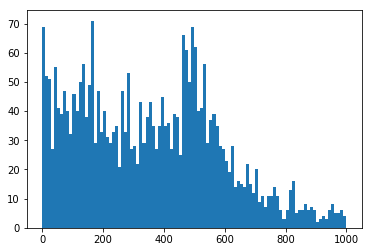

In [11]:
n_bins = 100
plt.hist(Ratios[array]*128*128, bins=n_bins, range = (0,1000))

In [43]:
np.random.randint(2, size=81703)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1])